In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, silhouette_score
from scipy import stats
import time
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
df = pd.read_csv('tax.csv')

In [ ]:
df.shape

(23735, 17)

In [ ]:
df.size

403495

In [ ]:
df.head()

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
0,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"Under 5,000",NaN,115872.0,28535.362,121985.033,1.000,3335.610,133.528,-7226.155,1,1
1,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"5,000 - 9,999",NaN,64472.0,497520.476,453287.232,3907.523,40325.721,1613.677,-24640.639,1,2
2,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"10,000 - 19,999",NaN,125775.0,1848243.085,1222947.457,87664.662,537630.966,21717.698,-83445.904,1,3
3,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"20,000 - 29,999",NaN,82181.0,2028682.259,867453.711,73712.451,1087516.097,47154.276,-11812.793,1,4
4,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"30,000 - 39,999",NaN,64824.0,2259143.529,713694.013,58814.362,1486635.154,70580.685,38910.764,1,5


In [ ]:
df.tail()

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
23730,1999,Part-Year Resident,"Grand Total, Part-Year Resident",All,All - Excluding New York,"Grand Total, Part-Year Resident","60,000 - 74,999",NaN,12162.0,815706.0,144258.0,6712.0,664715.0,38220.0,21242.0,250,8
23731,1999,Part-Year Resident,"Grand Total, Part-Year Resident",All,All - Excluding New York,"Grand Total, Part-Year Resident","75,000 - 99,999",NaN,12834.0,1109815.0,168914.0,8065.0,932836.0,55786.0,30999.0,250,9
23732,1999,Part-Year Resident,"Grand Total, Part-Year Resident",All,All - Excluding New York,"Grand Total, Part-Year Resident","100,000 - 199,999",NaN,17127.0,2328243.0,277682.0,12913.0,2037648.0,134922.0,74139.0,250,10
23733,1999,Part-Year Resident,"Grand Total, Part-Year Resident",All,All - Excluding New York,"Grand Total, Part-Year Resident","200,000 and over",NaN,8378.0,5239525.0,212895.0,6809.0,4971908.0,340576.0,174977.0,250,11
23734,1999,Part-Year Resident,"Grand Total, Part-Year Resident",All,All - Excluding New York,"Grand Total, Part-Year Resident",Total,NaN,177887.0,12678356.0,1880248.0,69613.0,10680538.0,673875.0,355980.0,250,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tax Year                                            23735 non-null  int64  
 1   Resident Type                                       23735 non-null  object 
 2   Place of Residence                                  23735 non-null  object 
 3   Country                                             23735 non-null  object 
 4   State                                               23735 non-null  object 
 5   County                                              23735 non-null  object 
 6   Income Class                                        23735 non-null  object 
 7   Disclosure                                          296 non-null    object 
 8   Number of All Returns                               23439 non-null  float64


In [ ]:
df.describe()

,Tax Year,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
count,23735.000000,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,23735.000000,23735.000000
mean,2007.220645,2.531241e+04,2.137719e+06,3.229005e+05,1.411666e+04,1.752082e+06,1.204284e+05,8.154471e+04,81.604803,7.073773
std,4.632102,2.385621e+05,1.834359e+07,2.876288e+06,1.312834e+05,1.533540e+07,1.079722e+06,8.377998e+05,62.110581,3.827778
min,1999.000000,0.000000e+00,-1.370167e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.674791e+05,1.000000,1.000000
25%,2003.000000,2.210000e+02,1.088650e+04,2.882000e+03,4.400000e+01,4.779388e+03,2.360000e+02,3.646000e+01,30.000000,4.000000
50%,2008.000000,1.618000e+03,7.498000e+04,1.913200e+04,5.960000e+02,4.828600e+04,2.573000e+03,1.364905e+03,59.000000,7.000000
75%,2011.000000,5.996000e+03,3.659255e+05,7.283900e+04,2.907000e+03,2.588935e+05,1.526408e+04,8.602500e+03,128.000000,10.000000
max,2014.000000,9.082186e+06,6.736595e+08,1.092628e+08,4.720151e+06,5.755124e+08,3.912255e+07,3.501178e+07,250.000000,14.000000


In [ ]:
print(sum(df.duplicated()))

0


In [ ]:
df.columns

Index(['Tax Year', 'Resident Type', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Disclosure', 'Number of All Returns',
       'NY AGI of All Returns (in thousands) *',
       'Deductions of All Returns (in thousands)',
       'Dependent Exemptions of All Returns (in thousands)',
       'Taxable Income of All Returns (in thousands)',
       'Tax Before Credits of All Returns (in thousands)',
       'Tax Liability of All Returns (in thousands) **',
       'Place of Residence Sort Order', 'Income Class Sort Order'],
      dtype='object')

In [ ]:
df.size

403495

In [ ]:
df.shape

(23735, 17)

In [ ]:
new_column_names = {
    'Tax Year': 'Tax_Year',
    'Resident Type': 'Resident_Type',
    'Place of Residence': 'Place_of_Residence',
    'Country': 'Country',
    'State': 'State',
    'County': 'County',
    'Income Class': 'Income_Class',
    'Disclosure': 'Disclosure',
    'Number of All Returns': 'Number_of_All_Returns',
    'NY AGI of All Returns (in thousands) *': 'NY_AGI_of_All_Returns',
    'Deductions of All Returns (in thousands)': 'Deductions_of_All_Returns',
    'Dependent Exemptions of All Returns (in thousands)': 'Dependent_Exemptions_of_All_Returns',
    'Taxable Income of All Returns (in thousands)': 'Taxable_Income_of_All_Returns',
    'Tax Before Credits of All Returns (in thousands)': 'Tax_Before_Credits_of_All_Returns',
    'Tax Liability of All Returns (in thousands) **': 'Tax_Liability_of_All_Returns',
    'Place of Residence Sort Order': 'Place_of_Residence_Sort_Order',
    'Income Class Sort Order': 'Income_Class_Sort_Order'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Check the updated columns
print(df.columns)

Index(['Tax_Year', 'Resident_Type', 'Place_of_Residence', 'Country', 'State',
       'County', 'Income_Class', 'Disclosure', 'Number_of_All_Returns',
       'NY_AGI_of_All_Returns', 'Deductions_of_All_Returns',
       'Dependent_Exemptions_of_All_Returns', 'Taxable_Income_of_All_Returns',
       'Tax_Before_Credits_of_All_Returns', 'Tax_Liability_of_All_Returns',
       'Place_of_Residence_Sort_Order', 'Income_Class_Sort_Order'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Updated categorical columns after renaming
categorical_columns = ['Resident_Type',
    'Country',
    'State',
    'County',
    'Income_Class',
    'Place_of_Residence']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now all the categorical columns are label-encoded
df.head()


,Tax_Year,Resident_Type,Place_of_Residence,Country,State,County,Income_Class,Disclosure,Number_of_All_Returns,NY_AGI_of_All_Returns,Deductions_of_All_Returns,Dependent_Exemptions_of_All_Returns,Taxable_Income_of_All_Returns,Tax_Before_Credits_of_All_Returns,Tax_Liability_of_All_Returns,Place_of_Residence_Sort_Order,Income_Class_Sort_Order
0,2014,1,140,17,35,36,14,NaN,115872.0,28535.362,121985.033,1.000,3335.610,133.528,-7226.155,1,1
1,2014,1,140,17,35,36,8,NaN,64472.0,497520.476,453287.232,3907.523,40325.721,1613.677,-24640.639,1,2
2,2014,1,140,17,35,36,0,NaN,125775.0,1848243.085,1222947.457,87664.662,537630.966,21717.698,-83445.904,1,3
3,2014,1,140,17,35,36,2,NaN,82181.0,2028682.259,867453.711,73712.451,1087516.097,47154.276,-11812.793,1,4
4,2014,1,140,17,35,36,6,NaN,64824.0,2259143.529,713694.013,58814.362,1486635.154,70580.685,38910.764,1,5


<ipython-input-23-a0038c2ae0bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')


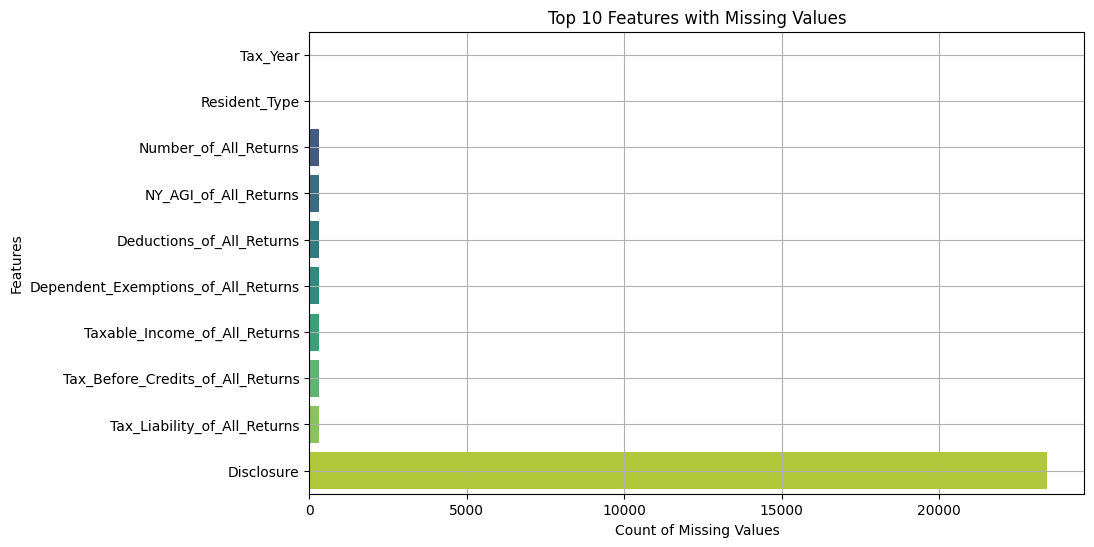

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 features with missing values
missing_values = df.isna().sum(axis=0).nlargest(10).sort_values()

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')

# Add labels and formatting
plt.grid(True)
plt.xlabel('Count of Missing Values')
plt.ylabel('Features')
plt.title('Top 10 Features with Missing Values')
plt.show()


In [ ]:
df.drop(columns=["Disclosure"],inplace=True)

In [ ]:
# List of columns to fill missing values
# Updated list of columns to fill missing values
columns_to_fill = [
    'Number_of_All_Returns',
    'NY_AGI_of_All_Returns',
    'Deductions_of_All_Returns',
    'Dependent_Exemptions_of_All_Returns',
    'Tax_Before_Credits_of_All_Returns',
    'Tax_Liability_of_All_Returns',
    'Taxable_Income_of_All_Returns'
]


# Fill missing values with the mean for each column
for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

# Check if the missing values have been filled
print(df[columns_to_fill].isnull().sum())

Number_of_All_Returns                  0
NY_AGI_of_All_Returns                  0
Deductions_of_All_Returns              0
Dependent_Exemptions_of_All_Returns    0
Tax_Before_Credits_of_All_Returns      0
Tax_Liability_of_All_Returns           0
Taxable_Income_of_All_Returns          0
dtype: int64


<ipython-input-25-411986753770>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


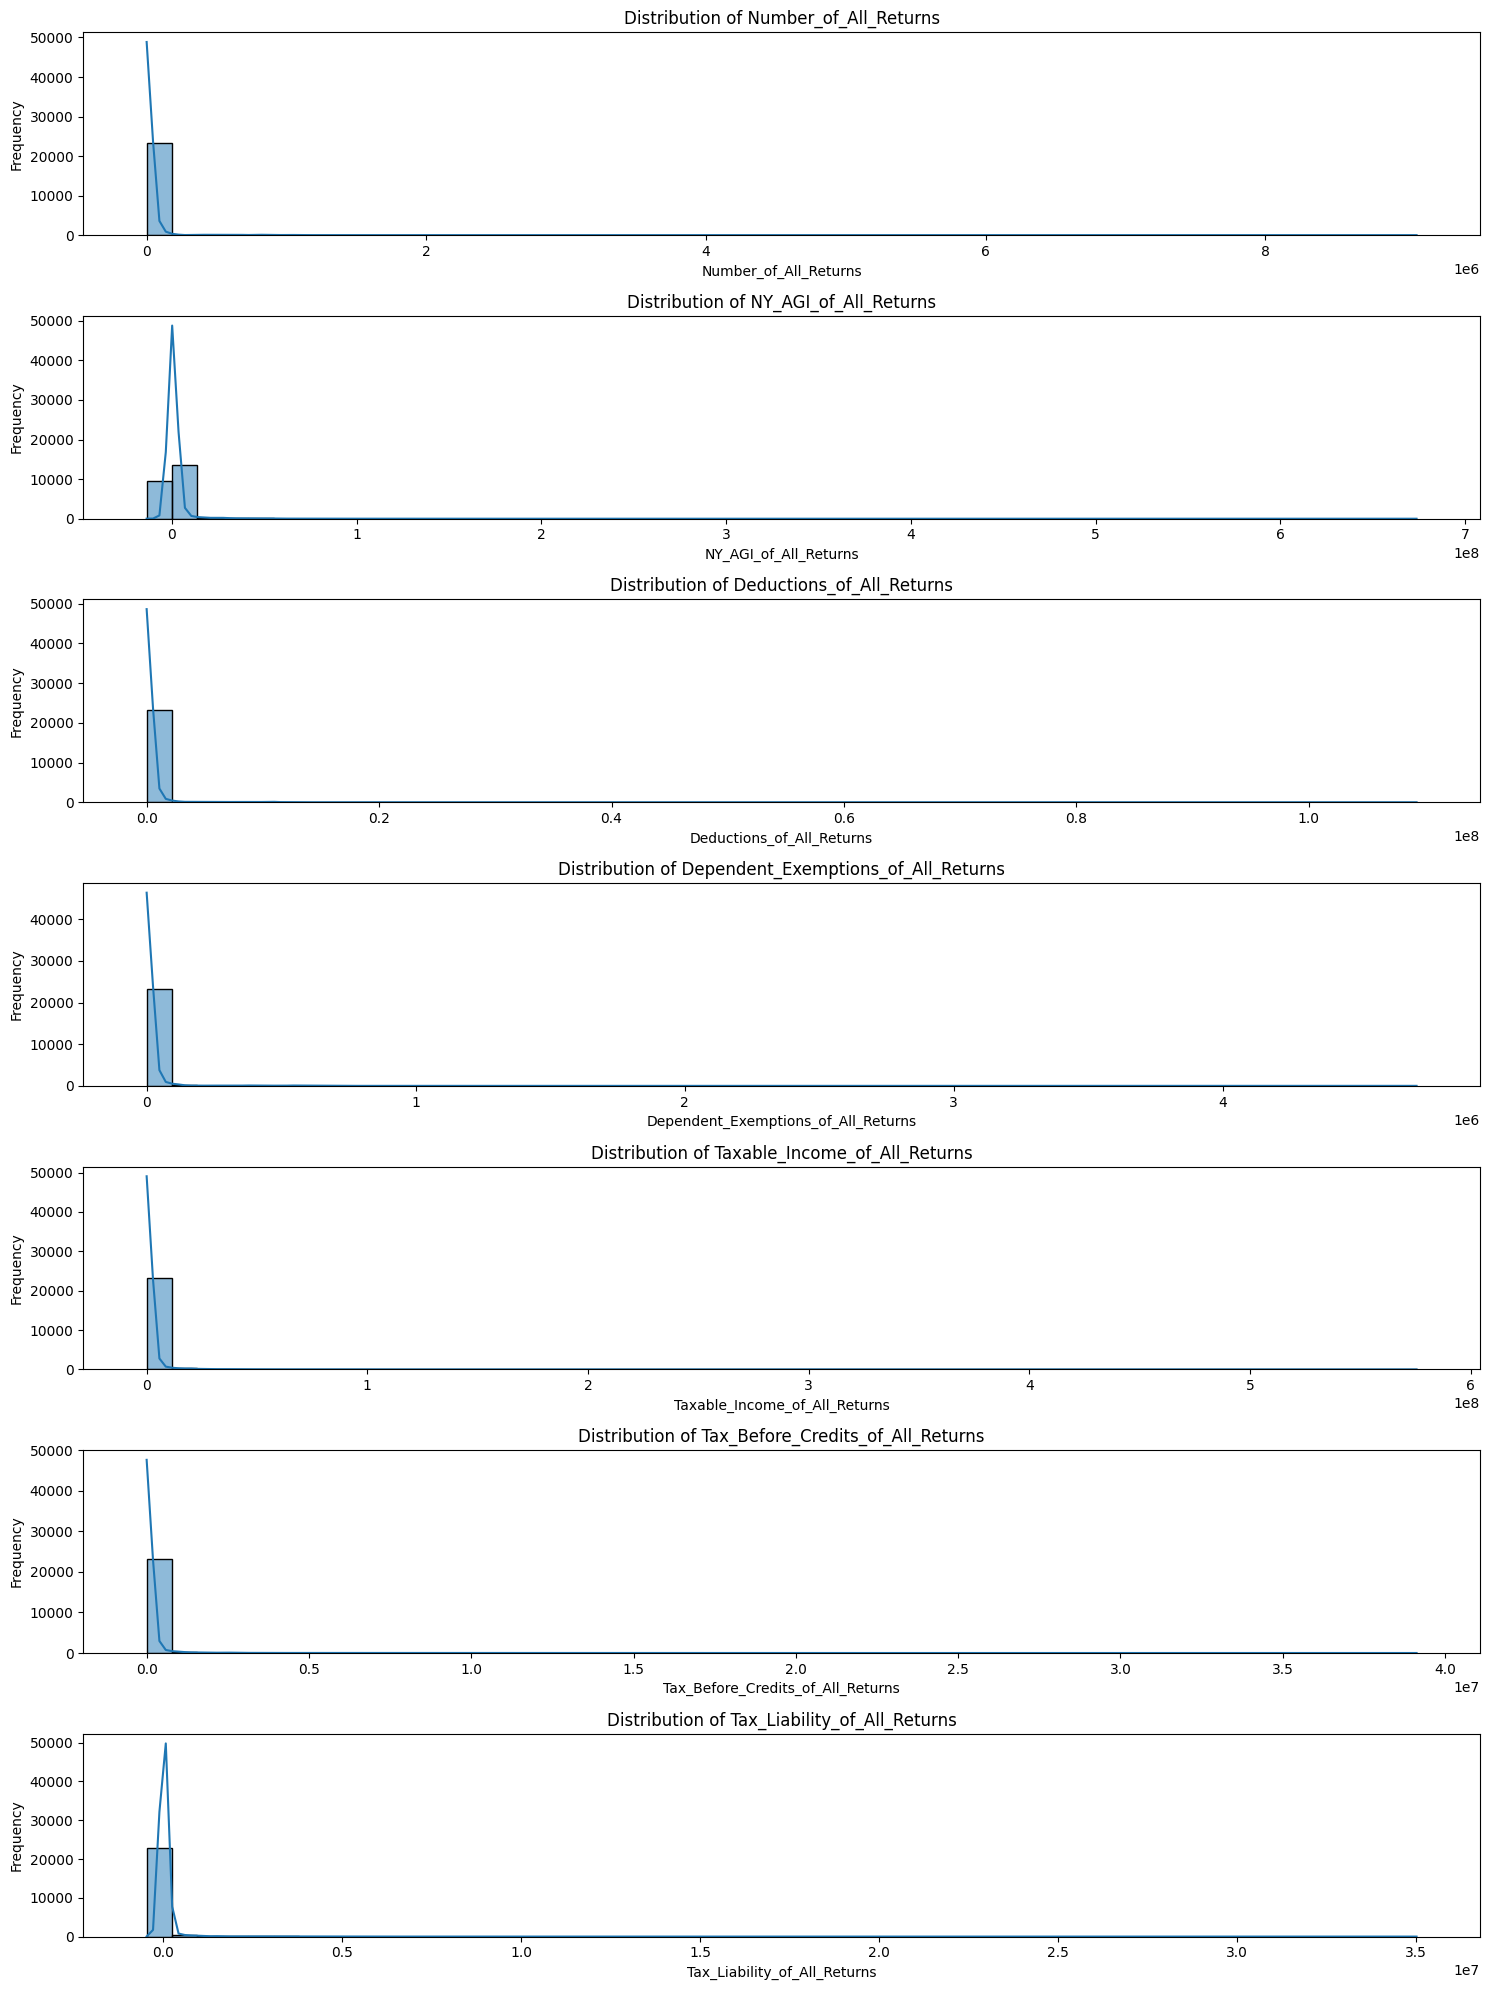

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updated continuous numerical columns after renaming
continuous_columns = [
    'Number_of_All_Returns', 'NY_AGI_of_All_Returns',
    'Deductions_of_All_Returns', 'Dependent_Exemptions_of_All_Returns',
    'Taxable_Income_of_All_Returns', 'Tax_Before_Credits_of_All_Returns',
    'Tax_Liability_of_All_Returns'
]

# Set up the plotting area
plt.figure(figsize=(15, 20))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(len(continuous_columns), 1, i)
    # Use the raw data without log transformation
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


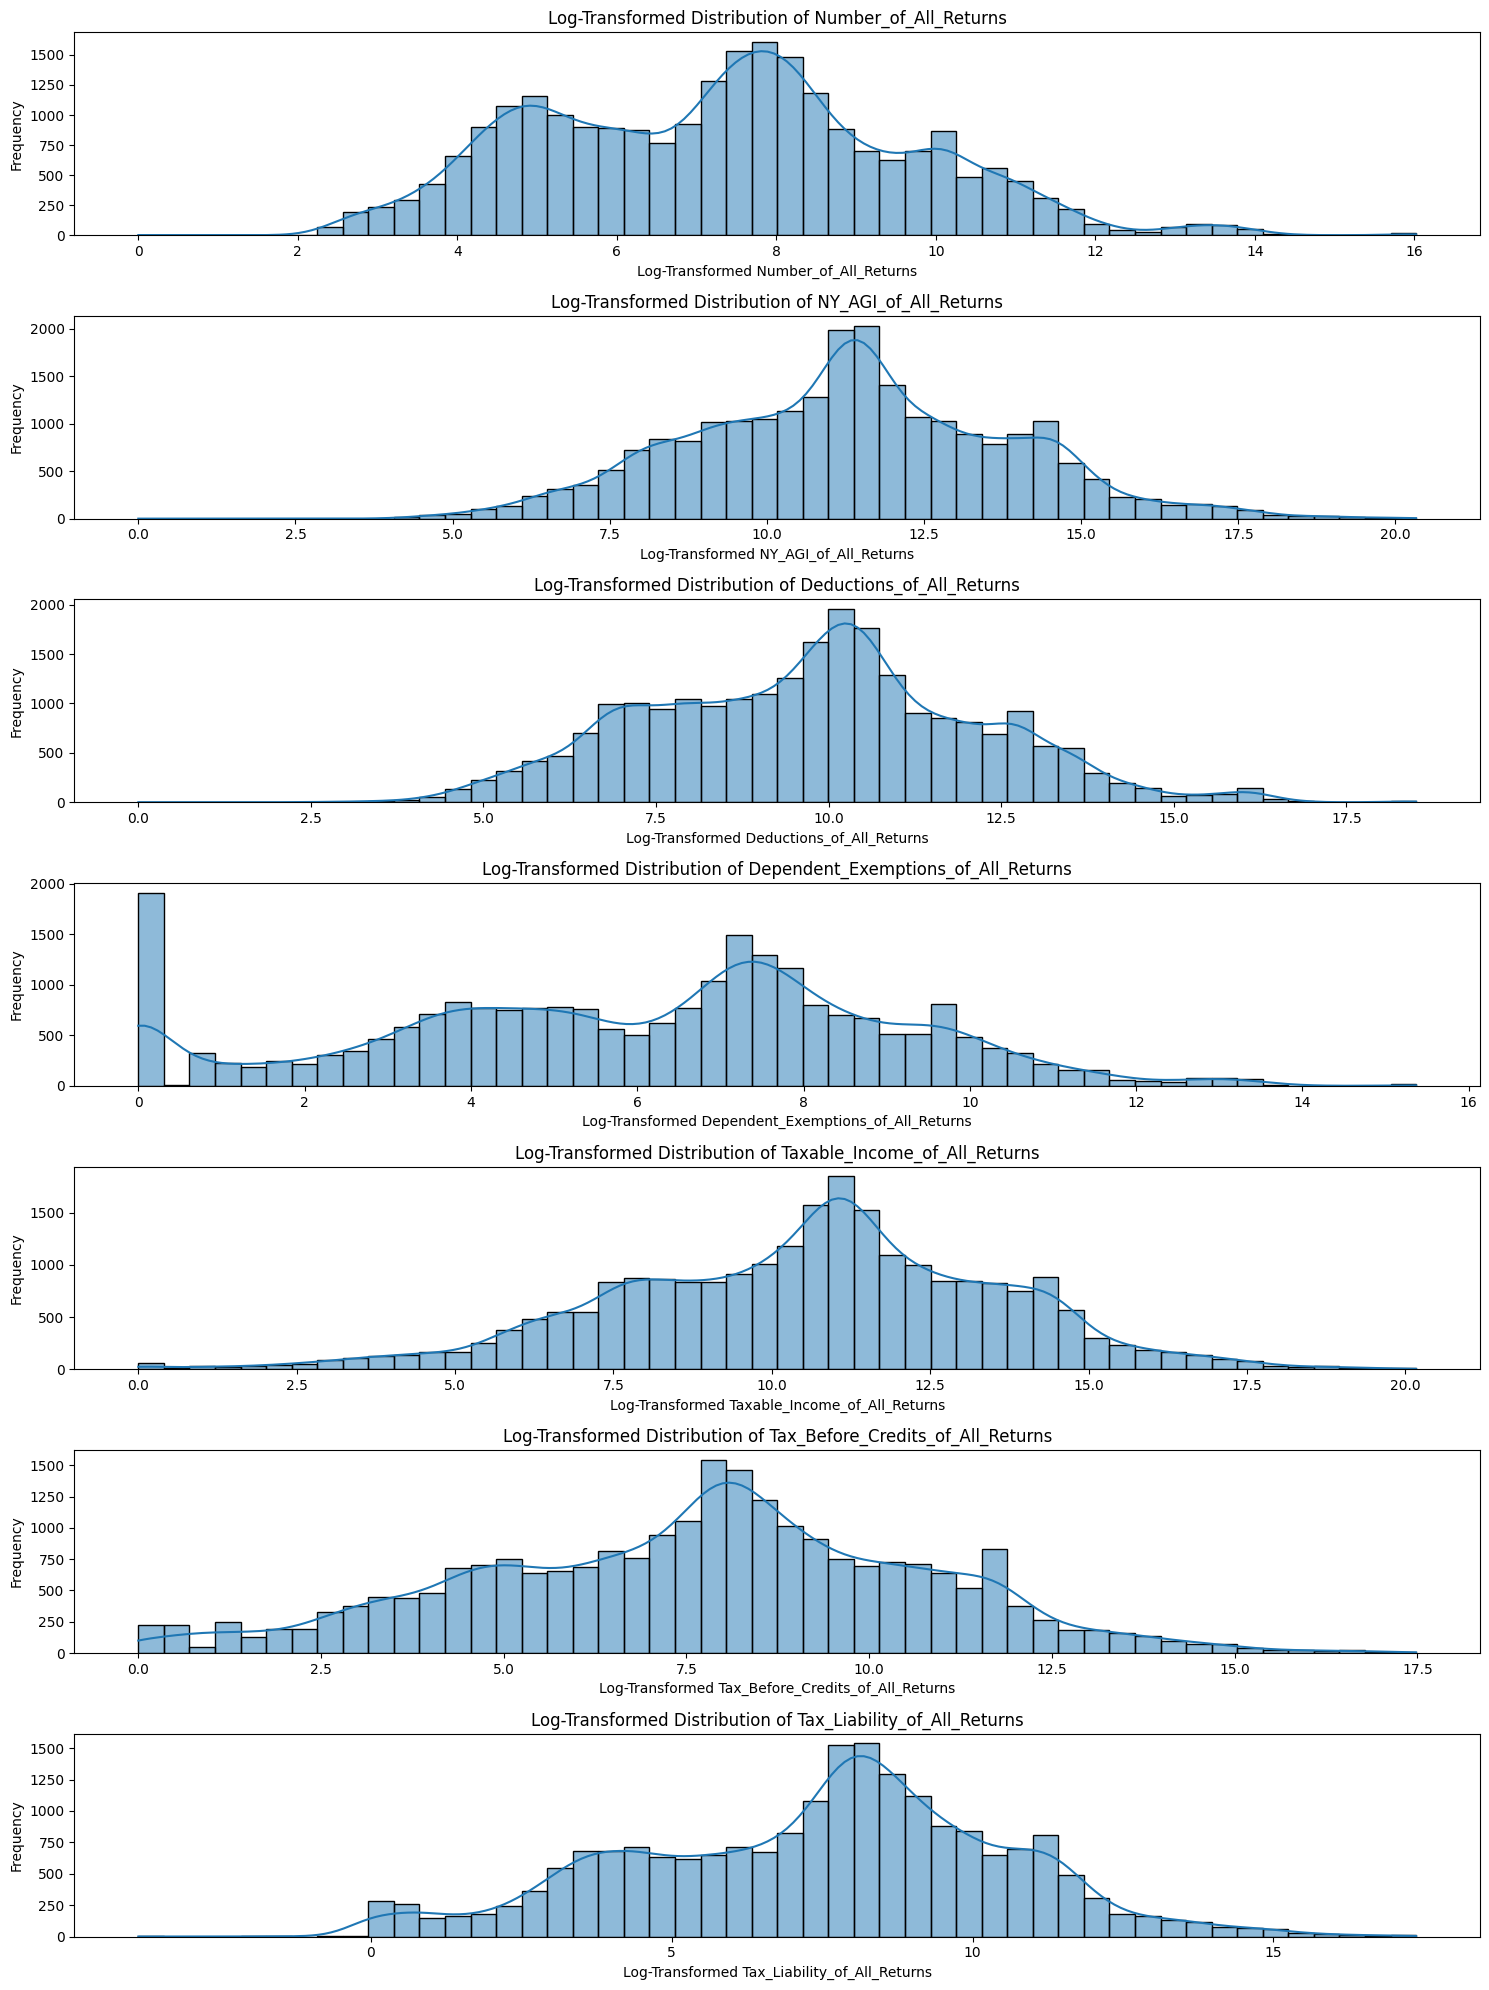

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updated continuous numerical columns after renaming
continuous_columns = [
    'Number_of_All_Returns', 'NY_AGI_of_All_Returns',
    'Deductions_of_All_Returns', 'Dependent_Exemptions_of_All_Returns',
    'Taxable_Income_of_All_Returns', 'Tax_Before_Credits_of_All_Returns',
    'Tax_Liability_of_All_Returns'
]

# Set up the plotting area
plt.figure(figsize=(15, 20))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(len(continuous_columns), 1, i)
    # Apply log transformation; add a small constant to avoid log(0)
    log_data = np.log1p(df[col])
    sns.histplot(log_data, kde=True, bins=50)
    plt.title(f'Log-Transformed Distribution of {col}')
    plt.xlabel(f'Log-Transformed {col}')
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()



<ipython-input-28-ebcba1c0bd43>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_cardinality.values, y=feature_cardinality.index, palette='plasma')


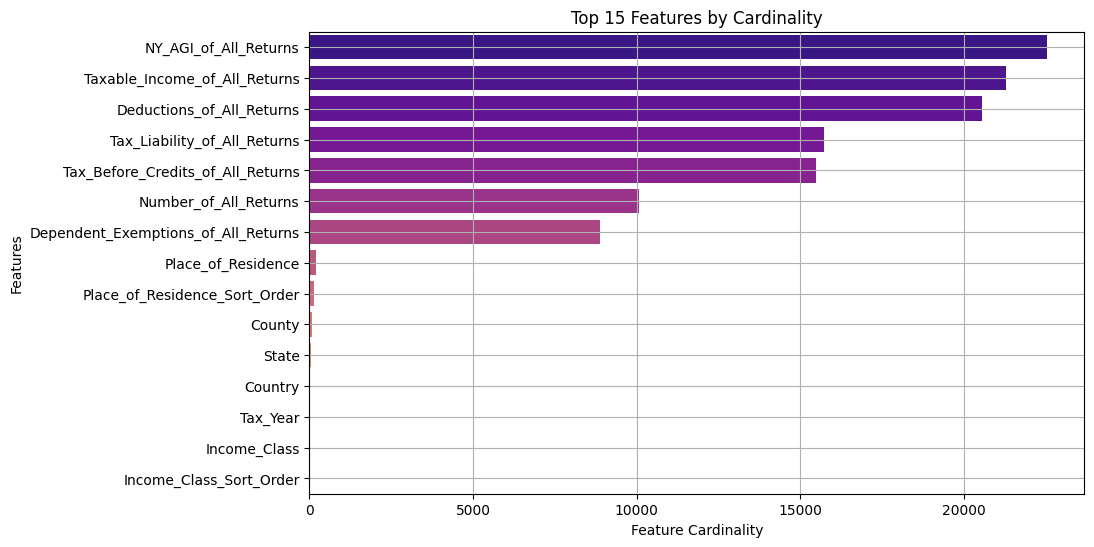

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate cardinality of each feature and sort in descending order
feature_cardinality = df.nunique().sort_values(ascending=False).nlargest(15)

# Plot the top 15 features with the highest cardinality
plt.figure(figsize=(10,6))
sns.barplot(x=feature_cardinality.values, y=feature_cardinality.index, palette='plasma')

# Add labels and formatting
plt.grid(True)
plt.xlabel('Feature Cardinality')
plt.ylabel('Features')
plt.title('Top 15 Features by Cardinality')


# Display the plot
plt.show()


In [ ]:
import pandas as pd

def display_high_missing_values(df, threshold=0.9):

    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean()

    # Identify columns with more than the specified threshold of missing values
    high_missing_columns = missing_percentage[missing_percentage > threshold].index.tolist()

    # Display the result
    if high_missing_columns:
        print(f'Columns with more than {threshold*100}% missing values:')
        for column in high_missing_columns:
            print(f'- {column}: {missing_percentage[column]*100:.2f}% missing')
    else:
        print('No columns have more than 90% missing values.')



# Call the function
display_high_missing_values(df)

No columns have more than 90% missing values.


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwa

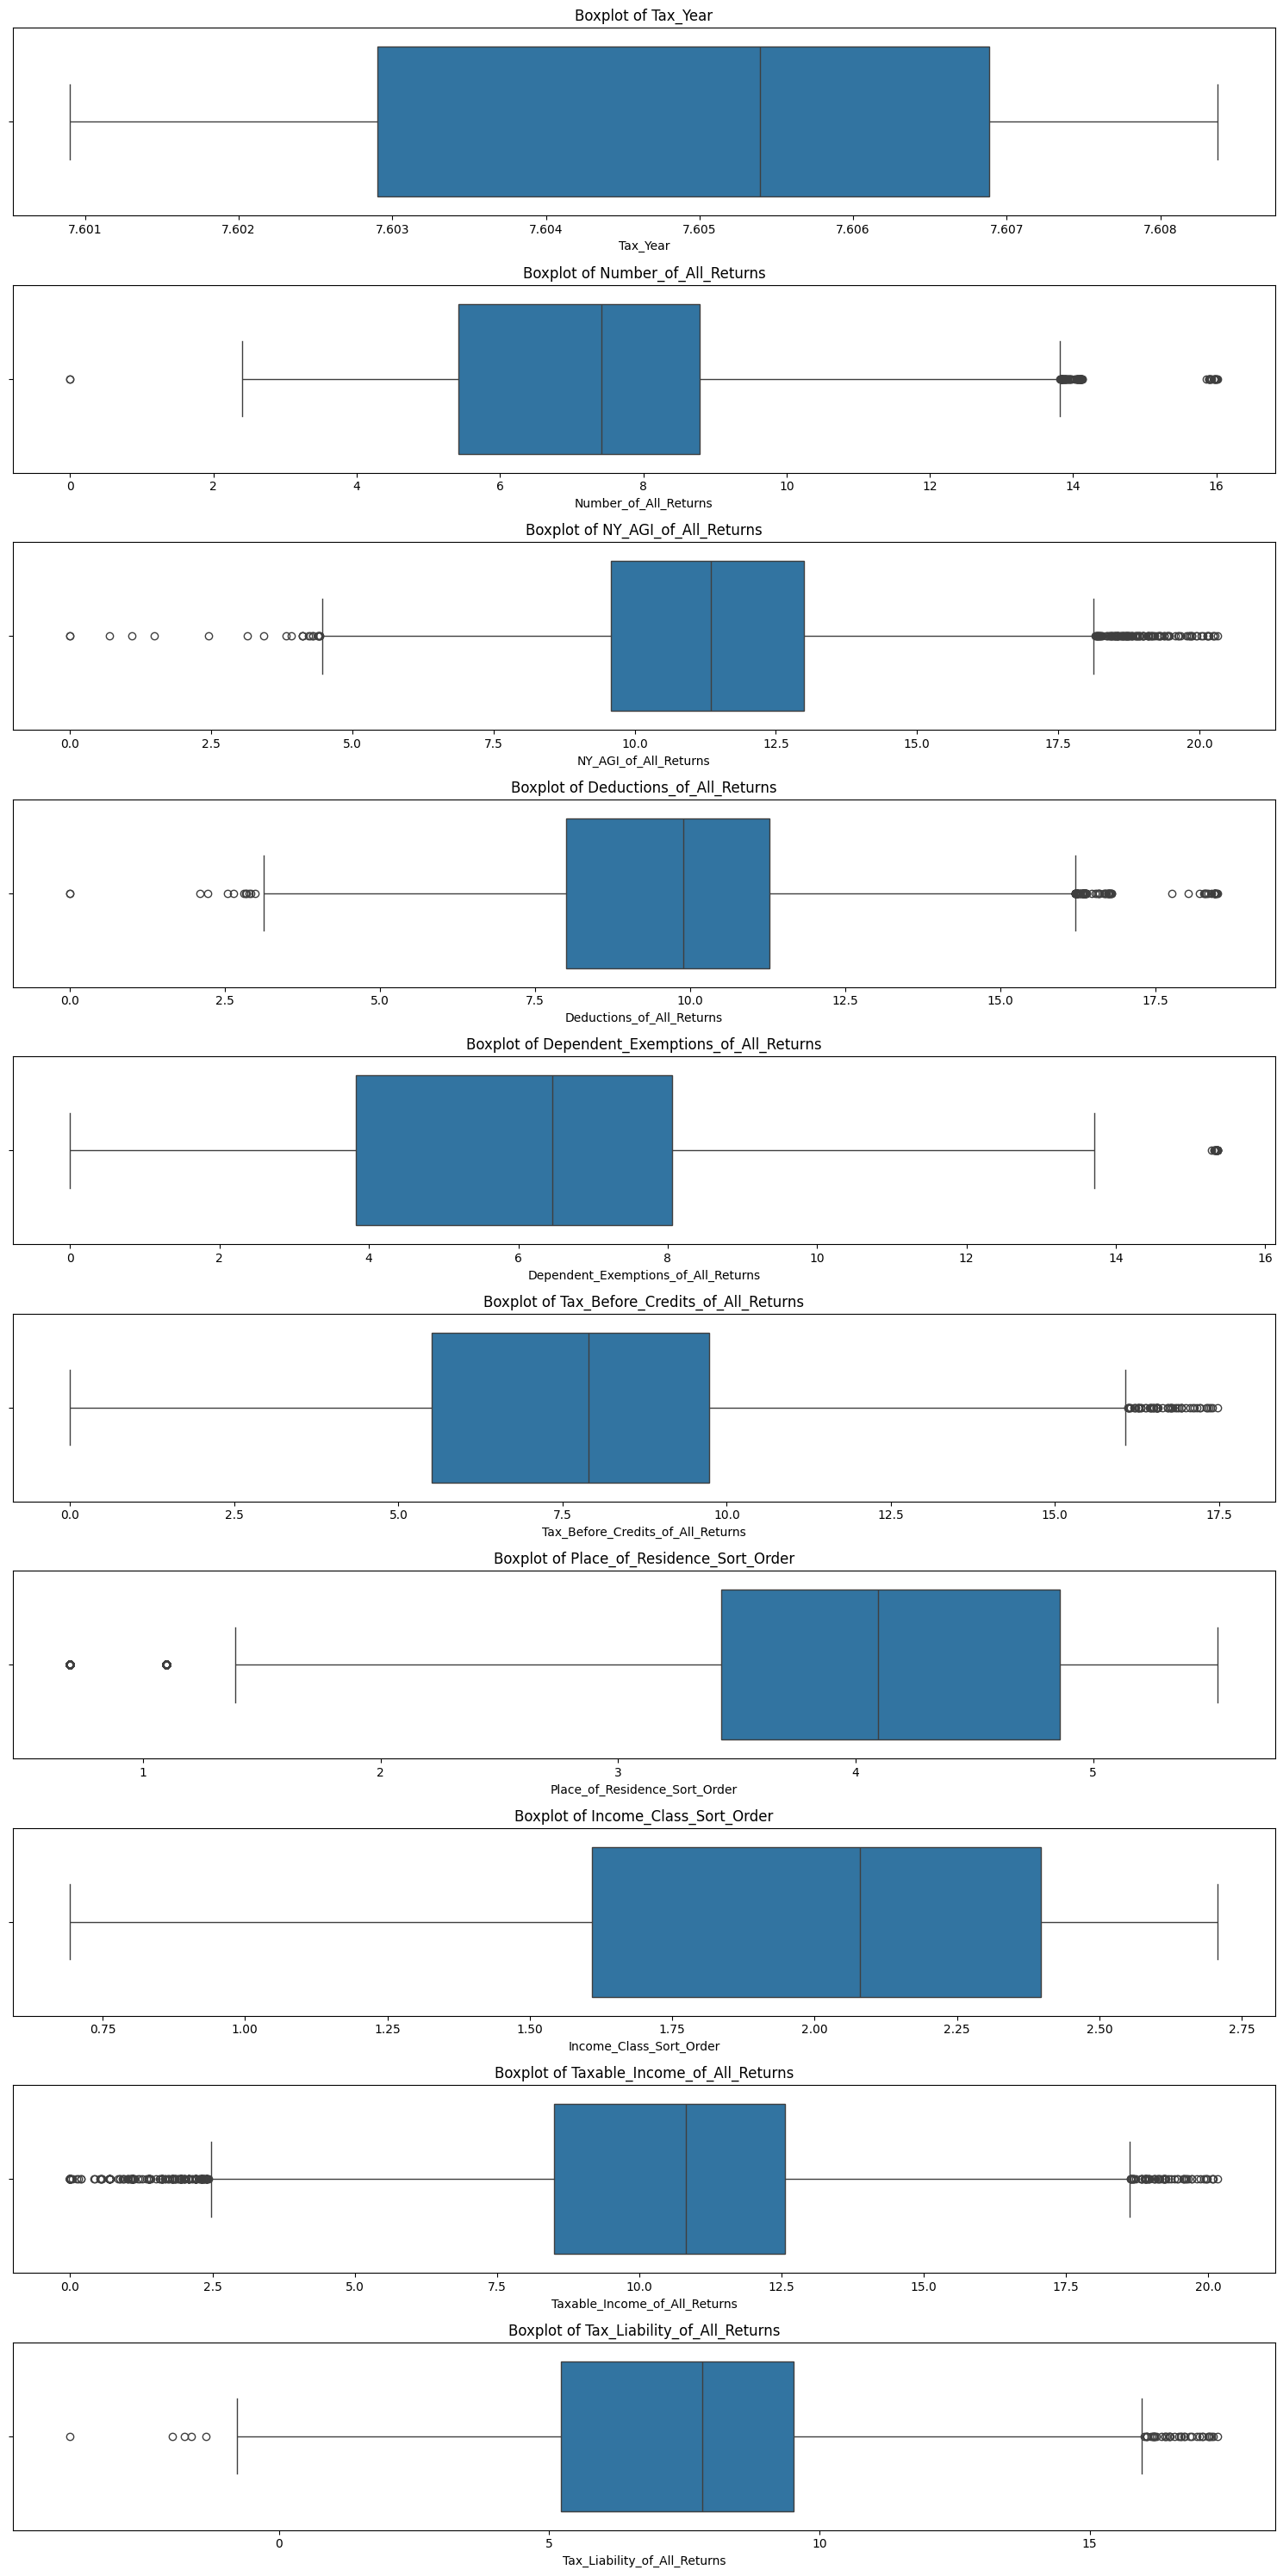

In [ ]:
# Updated list of numerical columns to plot
num_cols = [
    'Tax_Year', 'Number_of_All_Returns', 'NY_AGI_of_All_Returns',
    'Deductions_of_All_Returns', 'Dependent_Exemptions_of_All_Returns',
     'Tax_Before_Credits_of_All_Returns',
    'Place_of_Residence_Sort_Order', 'Income_Class_Sort_Order','Taxable_Income_of_All_Returns' ,'Tax_Liability_of_All_Returns'
]

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 30))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(data= np.log1p(df[num_cols]), x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


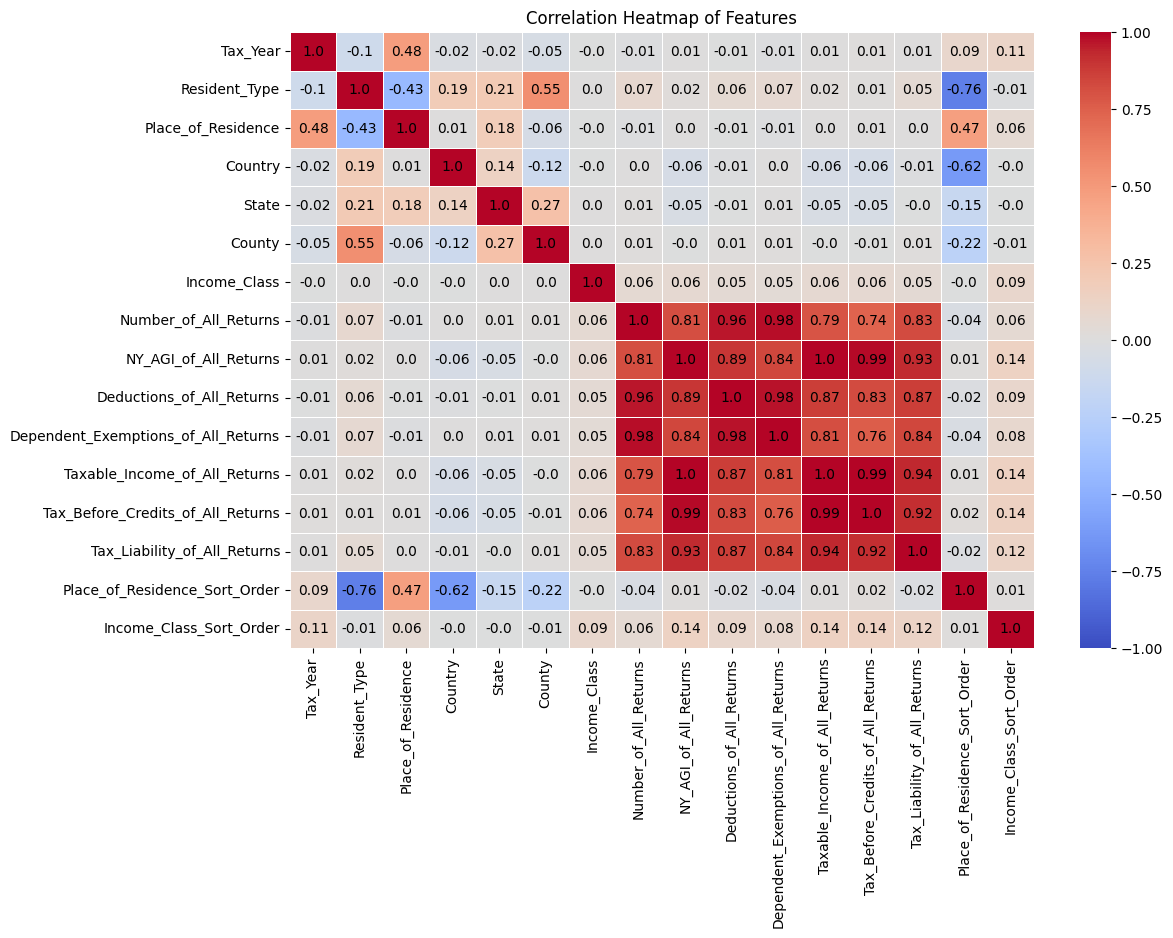

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume 'data' is your DataFrame containing the features.
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap without annotations first
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Manually add annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j + 0.5, i + 0.5, round(correlation_matrix.iloc[i, j], 2),
                        ha="center", va="center", color="black")

# Display the heatmap
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
class AnomalyDetector:
    def __init__(self, data, features, n_clusters=5):
        self.data = data
        self.features = features
        self.n_clusters = n_clusters
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='mean')
        self.model = KMeans(n_clusters=self.n_clusters, random_state=42)

    def preprocess_data(self):
        """
        Preprocesses the data by selecting relevant features,
        imputing missing values, and scaling.
        """
        X = self.data[self.features]
        X_imputed = self.imputer.fit_transform(X)
        X_scaled = self.scaler.fit_transform(X_imputed)

        # If X has column names, set the feature names in the scaler
        if hasattr(X, 'columns'):
            self.scaler.feature_names_in_ = X.columns

        return X_scaled

    def train_model(self, X_scaled):
        """
        Trains the KMeans clustering model.
        """
        self.model.fit(X_scaled)

    def evaluate_model(self, X_scaled):
        """
        Evaluates the clustering model using the silhouette score.
        """
        labels = self.model.labels_
        score = silhouette_score(X_scaled, labels)
        print(f"Silhouette Score: {score}")

    def predict_anomalies(self):
        """
        Predicts anomalies based on cluster distances.
        """
        X_scaled = self.preprocess_data()
        self.data['cluster'] = self.model.predict(X_scaled).astype(int)

        # Calculate the distance to the cluster center
        self.data['distance_to_center'] = [
            self.calculate_distance(self.data.iloc[i], X_scaled[i])
            for i in range(len(self.data))
        ]

        # Flag anomalies based on a threshold (e.g., a certain percentile)
        threshold = self.data['distance_to_center'].quantile(0.95)
        self.data['anomaly'] = self.data['distance_to_center'] > threshold

    def calculate_distance(self, row, data_point):
        """
        Calculates the distance between a data point and its cluster center.
        """
        if pd.isna(row['cluster']):
            return np.nan
        cluster_center = self.model.cluster_centers_[int(row['cluster'])]
        distance = np.linalg.norm(data_point - cluster_center)
        return distance

    def get_anomalies(self):
        """
        Returns the data points labeled as anomalies.
        """
        return self.data[self.data['anomaly']]

In [ ]:
# Define the features to use (updated)
features = [
    'NY_AGI_of_All_Returns',
    'Deductions_of_All_Returns',
    'Dependent_Exemptions_of_All_Returns',
    'Tax_Before_Credits_of_All_Returns',
    'Tax_Liability_of_All_Returns',
    'Taxable_Income_of_All_Returns'
]

# Create and train the anomaly detector
detector = AnomalyDetector(df, features)
X_scaled = detector.preprocess_data()
detector.train_model(X_scaled)
detector.evaluate_model(X_scaled)
detector.predict_anomalies()

# Get the anomalies
anomalies = detector.get_anomalies()
print(anomalies)

Silhouette Score: 0.9533594835300576
       Tax_Year  Resident_Type  Place_of_Residence  Country  State  County  \
2          2014              1                 140       17     35      36   
13         2014              1                 140       17     35      36   
16         2014              1                 141       17     35      37   
17         2014              1                 141       17     35      37   
18         2014              1                 141       17     35      37   
...         ...            ...                 ...      ...    ...     ...   
23719      1999              0                  99        1      3      20   
23720      1999              0                  99        1      3      20   
23721      1999              0                  99        1      3      20   
23722      1999              0                  99        1      3      20   
23734      1999              2                 101        1      3      22   

       Income_Class  Numbe

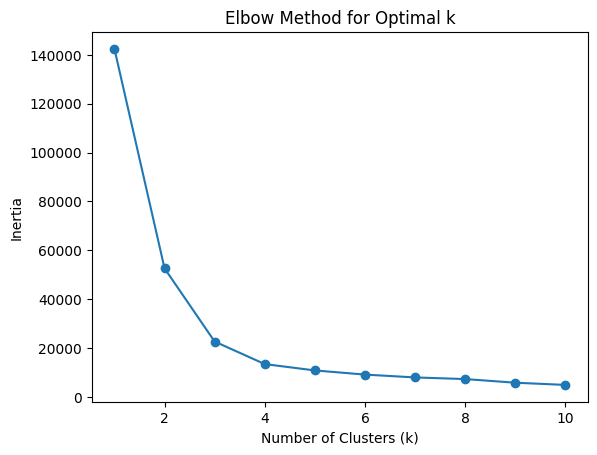

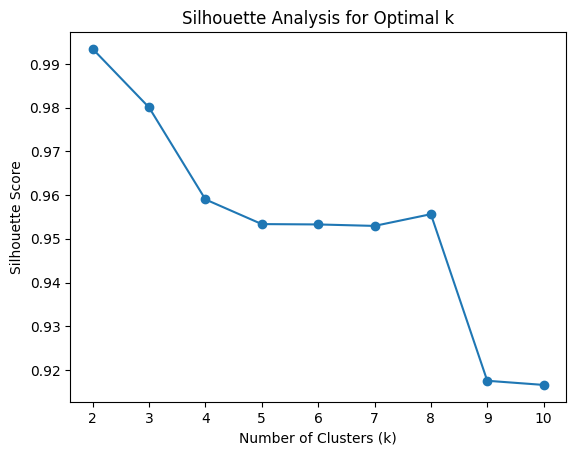

In [ ]:
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def plot_elbow_method(X, max_k):
    """
    Plots the elbow method graph to help determine the optimal number of clusters for KMeans.

    Args:
      X: The data to be clustered.
      max_k: The maximum number of clusters to consider.
    """
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

def plot_silhouette_scores(X, max_k):
    """
    Calculates and plots silhouette scores for different numbers of clusters.

    Args:
      X: The data to be clustered.
      max_k: The maximum number of clusters to consider.
    """
    silhouette_scores = []
    for k in range(2, max_k + 1):  # Silhouette score needs at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal k')
    plt.show()

# Assuming you have your data in X and want to consider up to 10 clusters
max_k = 10

# Plot the elbow method
plot_elbow_method(X_scaled, max_k)

# Plot the silhouette scores
plot_silhouette_scores(X_scaled, max_k)

From the graphs for both methods, we can see that the best value of k is 2 or 3

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df['anomaly'], test_size=0.2, random_state=42
)

In [ ]:
# Create and train the anomaly detector on the training set (using KMeans)
detector = AnomalyDetector(X_train, features)
X_train_scaled = detector.preprocess_data()
detector.train_model(X_train_scaled)
detector.predict_anomalies()

In [ ]:
# Apply KMeans to the testing set
X_test_scaled = detector.scaler.transform(X_test)
test_clusters = detector.model.predict(X_test_scaled)
X_test['cluster'] = test_clusters

In [ ]:
# Calculate distances for the test set (using KMeans)
X_test['distance_to_center'] = [
    detector.calculate_distance(X_test.iloc[i], X_test_scaled[i])
    for i in range(len(X_test))
]

In [ ]:
# Convert cluster assignments to anomaly predictions (using training set threshold from KMeans)
threshold_kmeans = detector.data['distance_to_center'].quantile(0.95)
y_pred_kmeans = np.array([True if dist > threshold_kmeans else False for dist in X_test['distance_to_center']])

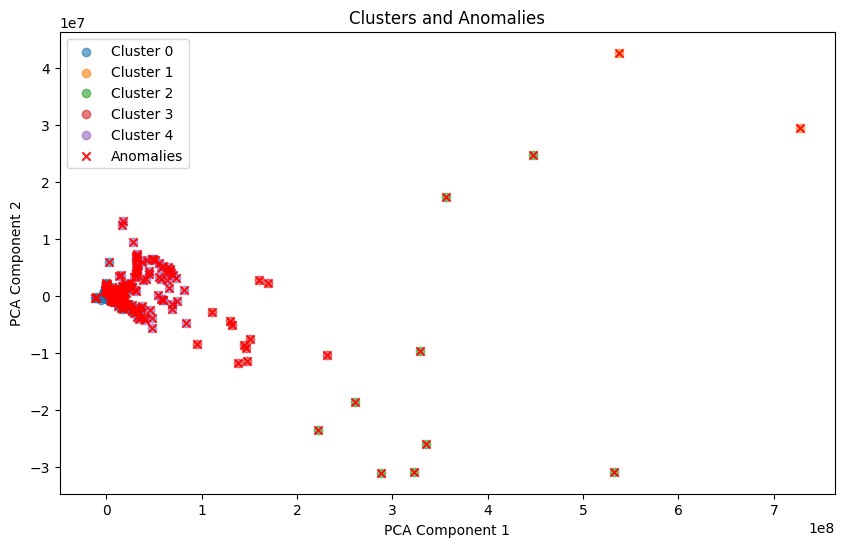

In [ ]:
# Option 1: Plot the clusters with PCA (Reducing dimensionality ot 2) (RECOMMENDED OPTION!) [DELETE UNWANTED OPTION TO KEEP ONLY 1!!]
import numpy as np
import matplotlib.pyplot as plt

# Convert the anomaly predictions into a boolean array
y_pred_kmeans = np.array([True if dist > threshold_kmeans else False for dist in X_test['distance_to_center']])

# Create a scatter plot of the clusters
def plot_clusters_with_anomalies(X_test, y_pred_kmeans, cluster_column='cluster'):
    """
    Plots a 2D scatter plot of clusters with anomalies highlighted.

    Args:
      X_test: The test data including cluster assignments and distance to cluster center.
      y_pred_kmeans: Boolean array indicating if a point is an anomaly.
      cluster_column: The column in X_test indicating cluster assignments.
    """
    # Reduce dimensionality to 2D for visualization using PCA
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2) #There are many features but we need to reduce to 2 PCAs to plot in the graph
    X_pca = pca.fit_transform(X_test.drop(columns=[cluster_column, 'distance_to_center']))

    # Separate clusters and anomalies
    clusters = X_test[cluster_column]
    anomalies = X_test[y_pred_kmeans]

    # Plot each cluster with a unique color
    plt.figure(figsize=(10, 6))
    for cluster_id in np.unique(clusters):
        cluster_points = X_pca[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.6)

    # Highlight anomalies
    anomaly_points = X_pca[y_pred_kmeans]
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', marker='x', label='Anomalies', alpha=0.9)

    # Add labels and legend
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Clusters and Anomalies')
    plt.legend()
    plt.show()

# Call the plotting function
plot_clusters_with_anomalies(X_test, y_pred_kmeans)


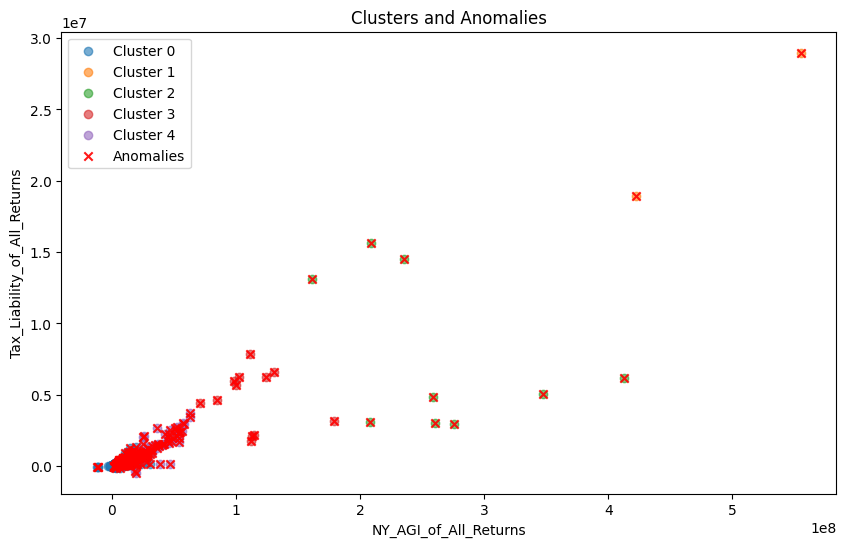

In [ ]:
# Option 2: Plot the clusters without PCA (i.e. no dimensionality reduction) [FOR UNDERSTANDING ONLY, DELETE UNWANTED OPTION TO KEEP ONLY 1!!]
import matplotlib.pyplot as plt
import numpy as np

# Convert the anomaly predictions into a boolean array
y_pred_kmeans = np.array([True if dist > threshold_kmeans else False for dist in X_test['distance_to_center']])

# Choose two features for visualization
feature_1 = 'NY_AGI_of_All_Returns'
feature_2 = 'Tax_Liability_of_All_Returns'

def plot_clusters_with_anomalies(X_test, y_pred_kmeans, feature_1, feature_2, cluster_column='cluster'):
    """
    Plots a 2D scatter plot of clusters using two selected features, with anomalies highlighted.

    Args:
      X_test: The test data including cluster assignments and distance to cluster center.
      y_pred_kmeans: Boolean array indicating if a point is an anomaly.
      feature_1: The first feature to use for plotting.
      feature_2: The second feature to use for plotting.
      cluster_column: The column in X_test indicating cluster assignments.
    """
    # Extract feature values
    x = X_test[feature_1]
    y = X_test[feature_2]
    clusters = X_test[cluster_column]

    plt.figure(figsize=(10, 6))

    # Plot each cluster with a unique color
    unique_clusters = np.unique(clusters)
    for cluster_id in unique_clusters:
        cluster_points = (clusters == cluster_id)
        plt.scatter(
            x[cluster_points],
            y[cluster_points],
            label=f'Cluster {cluster_id}',
            alpha=0.6
        )

    # Highlight anomalies
    plt.scatter(
        x[y_pred_kmeans],
        y[y_pred_kmeans],
        color='red',
        marker='x',
        label='Anomalies',
        alpha=0.9
    )

    # Add labels and legend
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title('Clusters and Anomalies')
    plt.legend()
    plt.show()

# Call the plotting function
plot_clusters_with_anomalies(X_test, y_pred_kmeans, feature_1, feature_2)


From literature, we found:

When to use Isolation Forest:
- When fraudsters’ behavior shifts frequently and the model needs to detect new fraud patterns without supervision.
- When you have a high-dimensional dataset with unknown fraud labels.

When to use k-means clustering:
- When fraud points are likely to deviate significantly from normal data clusters.
- When there is no assumption about the number of fraudulent behaviors.

Our income tax dataset and task of labelling to classify for fraud fits these conditions.Moreover, research shows these 2 methods can be combined for better results by using k-means to do the initial clustering and then using isolation forest to identify anomalies. That is what we are going to do below.


In [ ]:
# Apply Isolation Forest for anomaly detection
model_isolation = IsolationForest(contamination=0.05, random_state=42)
X_scaled_isolation = detector.scaler.fit_transform(df[features])  # Scale all data for Isolation Forest
df['anomaly_isolation_forest'] = model_isolation.fit_predict(X_scaled_isolation) == -1

In [ ]:
# Get Isolation Forest predictions for the test set
y_pred_isolation = df.loc[X_test.index, 'anomaly_isolation_forest'].values

In [ ]:
# Combine KMeans and Isolation Forest predictions
y_pred_combined = y_pred_kmeans | y_pred_isolation #OR function is because OR is A Union B which takes the best of both models while AND would be A intersection B.

In [ ]:
# Print 10 rows of the test dataset
print(X_test.head(10))

       NY_AGI_of_All_Returns  Deductions_of_All_Returns  \
1510            1.939541e+07                 334583.952   
11917           2.353800e+04                   2733.000   
2638            2.494568e+05                  61472.103   
8121            3.700200e+04                   7995.000   
4783            3.518036e+05                  25944.523   
22758           5.701900e+04                  11404.000   
5348            4.781996e+03                   2498.601   
7221            3.548000e+03                   1081.000   
10227          -1.054759e+06                  18151.000   
16737           2.780100e+05                  15405.000   

       Dependent_Exemptions_of_All_Returns  Tax_Before_Credits_of_All_Returns  \
1510                              3992.000                        1200589.814   
11917                               74.000                           1221.000   
2638                              2799.694                           9802.435   
8121                      

In [ ]:
# Calculate and evaluate performance metrics for each model and the combined model
def evaluate_predictions(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("-" * 20)

evaluate_predictions(y_test, y_pred_kmeans, "KMeans")
evaluate_predictions(y_test, y_pred_isolation, "Isolation Forest")
evaluate_predictions(y_test, y_pred_combined, "Combined Model")

Metrics for KMeans:
Accuracy: 0.9987
Precision: 0.9771
Recall: 1.0000
F1-score: 0.9884
ROC AUC Score: 0.9993
--------------------
Metrics for Isolation Forest:
Accuracy: 0.9945
Precision: 0.9457
Recall: 0.9531
F1-score: 0.9494
ROC AUC Score: 0.9750
--------------------
Metrics for Combined Model:
Accuracy: 0.9968
Precision: 0.9446
Recall: 1.0000
F1-score: 0.9715
ROC AUC Score: 0.9983
--------------------


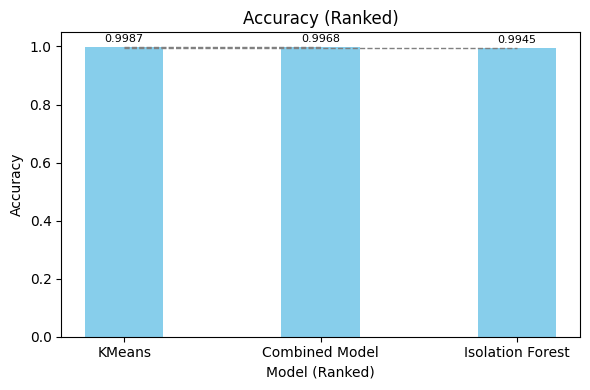

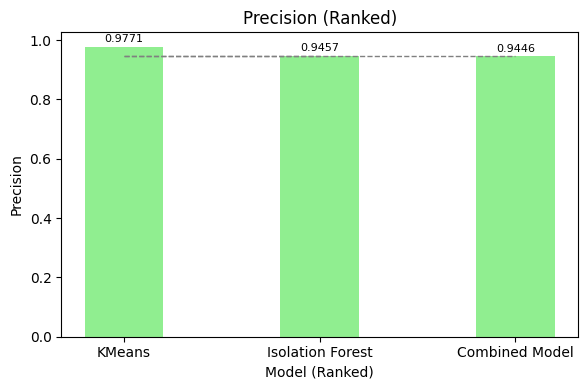

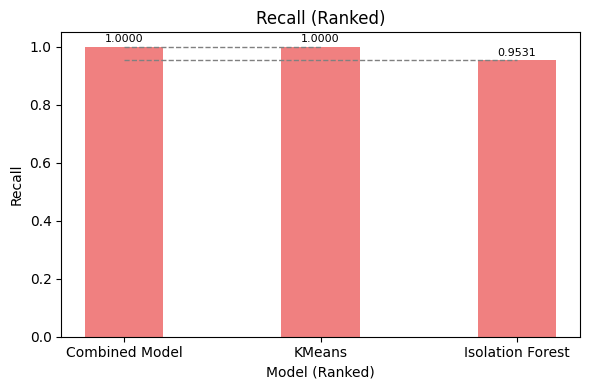

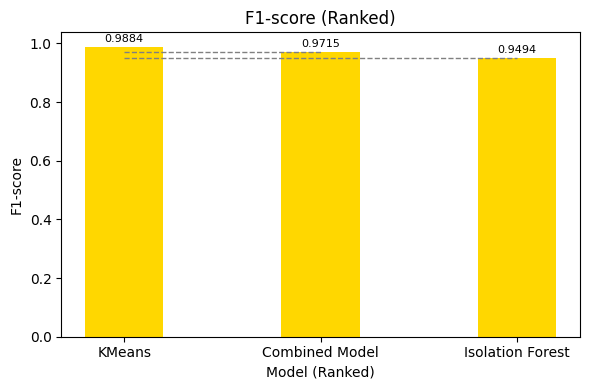

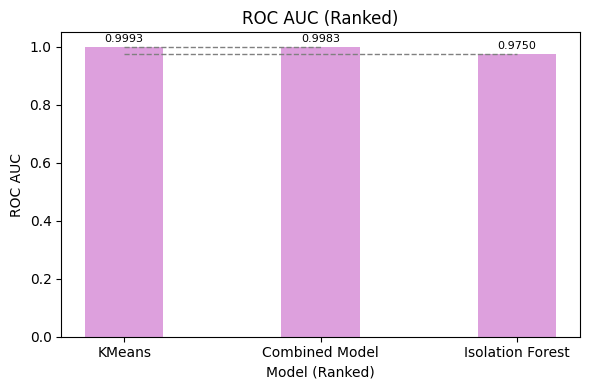

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metric scores for each model
accuracy = {"KMeans": 0.9987, "Isolation Forest": 0.9945, "Combined Model": 0.9968}
precision = {"KMeans": 0.9771, "Isolation Forest": 0.9457, "Combined Model": 0.9446}
recall = {"KMeans": 1.0000, "Isolation Forest": 0.9531, "Combined Model": 1.0000}
f1 = {"KMeans": 0.9884, "Isolation Forest": 0.9494, "Combined Model": 0.9715}
roc_auc = {"KMeans": 0.9993, "Isolation Forest": 0.9750, "Combined Model": 0.9983}

def plot_ranked_bars_separate_figures(accuracy, precision, recall, f1, roc_auc):
    """
    Plots ranked bar charts in separate figures for each metric with different colors,
    thinner bars, and measurement lines.

    Args:
      accuracy: A dictionary of accuracy scores for each model.
      precision: A dictionary of precision scores for each model.
      recall: A dictionary of recall scores for each model.
      f1: A dictionary of F1-scores for each model.
      roc_auc: A dictionary of ROC AUC scores for each model.
    """

    metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
    models = list(accuracy.keys())

    # Combine the metrics into a list for easier plotting
    all_metrics = [accuracy, precision, recall, f1, roc_auc]

    # Colors for each plot
    colors = ["skyblue", "lightgreen", "lightcoral", "gold", "plum"]

    for i, metric_name in enumerate(metrics):
        metric_values = [all_metrics[i][model] for model in models]
        sorted_indices = np.argsort(metric_values)[::-1]  # Sort in descending order
        sorted_models = [models[j] for j in sorted_indices]
        sorted_values = [metric_values[j] for j in sorted_indices]

        plt.figure(figsize=(6, 4))  # Create a new figure for each metric
        bars = plt.bar(sorted_models, sorted_values, color=colors[i], width=0.4)  # Thinner bars

        # Add measurement lines and annotations
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom', fontsize=8)
            plt.hlines(yval, xmin=0, xmax=bar.get_x() + bar.get_width()/2, colors='gray', linestyles='dashed', linewidth=1)

        plt.xlabel("Model (Ranked)")
        plt.ylabel(metric_name)
        plt.title(f"{metric_name} (Ranked)")

        plt.tight_layout()
        plt.show()

# Call the function to plot the ranked bars
plot_ranked_bars_separate_figures(accuracy, precision, recall, f1, roc_auc)

Inference: The best labelling model is the combined model as seen from the metrics above.

In [ ]:
df.columns

Index(['Tax_Year', 'Resident_Type', 'Place_of_Residence', 'Country', 'State',
       'County', 'Income_Class', 'Number_of_All_Returns',
       'NY_AGI_of_All_Returns', 'Deductions_of_All_Returns',
       'Dependent_Exemptions_of_All_Returns', 'Taxable_Income_of_All_Returns',
       'Tax_Before_Credits_of_All_Returns', 'Tax_Liability_of_All_Returns',
       'Place_of_Residence_Sort_Order', 'Income_Class_Sort_Order', 'cluster',
       'distance_to_center', 'anomaly', 'anomaly_isolation_forest'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tax_Year                             23735 non-null  int64  
 1   Resident_Type                        23735 non-null  int64  
 2   Place_of_Residence                   23735 non-null  int64  
 3   Country                              23735 non-null  int64  
 4   State                                23735 non-null  int64  
 5   County                               23735 non-null  int64  
 6   Income_Class                         23735 non-null  int64  
 7   Number_of_All_Returns                23735 non-null  float64
 8   NY_AGI_of_All_Returns                23735 non-null  float64
 9   Deductions_of_All_Returns            23735 non-null  float64
 10  Dependent_Exemptions_of_All_Returns  23735 non-null  float64
 11  Taxable_Income_of_All_Return

In [ ]:
df['anomaly'].value_counts()

,count
anomaly,
False,22548
True,1187


In [ ]:
df.to_csv('anomaly_labels.csv', index=False)

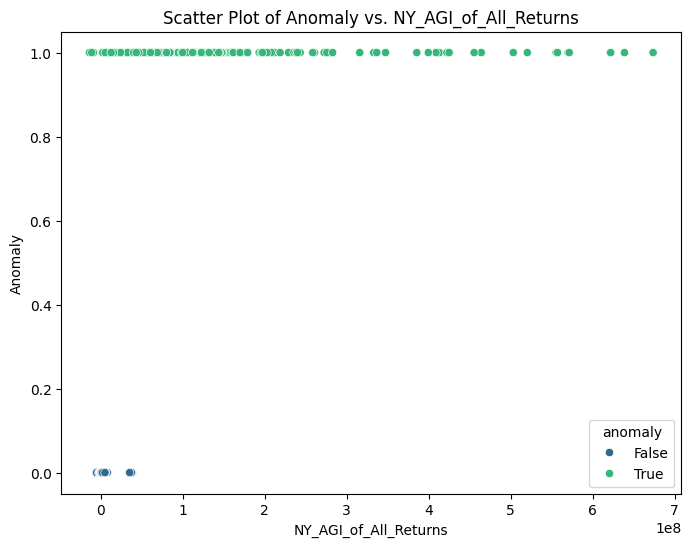

In [ ]:
# Choose a relevant feature for the x-axis
feature_x = 'NY_AGI_of_All_Returns'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature_x, y='anomaly', data=df, hue='anomaly', palette='viridis')
plt.title(f'Scatter Plot of Anomaly vs. {feature_x}')
plt.xlabel(feature_x)
plt.ylabel('Anomaly')
plt.show()

Here is an analysis of the visualization:

- **Scatter Plot**: The chart shows the relationship between "NY_AGI_of_All_Returns" (X-axis) and "Anomaly" (Y-axis).
- **Anomaly Variable**: The Y-axis represents a binary classification of anomalies, where `0` likely means "not an anomaly" and `1` means "anomaly."
- **Cluster Analysis**:
  - Most data points for `NY_AGI_of_All_Returns` cluster around lower values on the X-axis.
  - Anomalies (`True`) are concentrated at the top of the Y-axis, with their `NY_AGI_of_All_Returns` values spread across the range.
  - Non-anomalies (`False`) are located at the bottom of the Y-axis, and their `NY_AGI_of_All_Returns` values remain close to zero.
- **Outliers**:
  - The anomalies spread across a wide range of `NY_AGI_of_All_Returns`, possibly indicating irregular income patterns.
  - A concentration of non-anomalous points near `0` suggests that normal returns are associated with lower income.

The visualization suggests that anomalies are more common across various income levels, while normal cases are concentrated at lower income values.

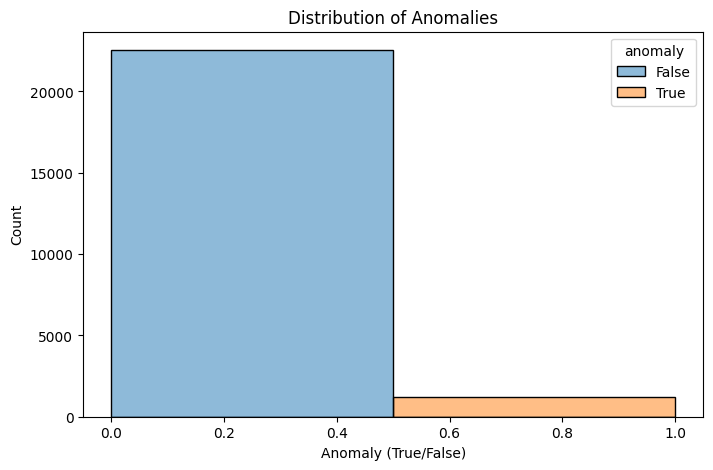

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Series to a DataFrame
df_anomaly = pd.DataFrame(df['anomaly'])

# Plot the histogram with different colors for each bar
plt.figure(figsize=(8, 5))
sns.histplot(df_anomaly, x='anomaly', kde=False, bins=2, hue='anomaly')  # Use x='anomaly'
plt.title('Distribution of Anomalies')
plt.xlabel('Anomaly (True/False)')
plt.ylabel('Count')
plt.show()

In the above histogram, if the recording is less than 0.5, the anomalydetector considers it as no-anomaly (False), if the value is above 0.5, its considered as an anomaly (True).

- **Imbalanced Data**:
  - The majority of the data corresponds to "False" anomalies (0), indicating normal cases.
  - Only a small proportion of the data corresponds to "True" anomalies (1), representing outliers or unusual cases.
- **Count Analysis**:
  - The count for "False" anomalies is significantly higher, exceeding 20,000.
  - The count for "True" anomalies is much smaller, likely below 2,000.

This distribution highlights a **class imbalance**, where anomalies are rare compared to normal cases. This imbalance might impact model training and evaluation, requiring techniques like resampling or weighted metrics for better handling of the minority class.

<ipython-input-55-af57468efb33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='anomaly', y=feature_x, data=df, palette='Set2')


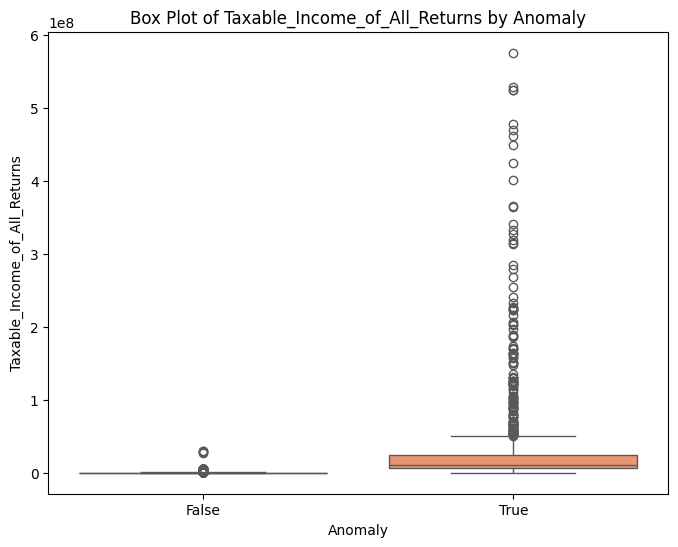

In [ ]:
# Choose a relevant feature for the x-axis
feature_x = 'Taxable_Income_of_All_Returns'

plt.figure(figsize=(8, 6))
sns.boxplot(x='anomaly', y=feature_x, data=df, palette='Set2')
plt.title(f'Box Plot of {feature_x} by Anomaly')
plt.xlabel('Anomaly')
plt.ylabel(feature_x)
plt.show()

- **Key Observations**:
  - For **"False" anomalies** (normal cases):
    - The taxable income is tightly clustered near lower values, with minimal variance.
    - There are a few outliers, but they remain relatively close to the main cluster.
  - For **"True" anomalies**:
    - The taxable income spans a much broader range, indicating significant variability.
    - The presence of many outliers with very high income values suggests that anomalies often involve exceptionally large taxable incomes.
    - The interquartile range (IQR) for anomalies is much wider compared to the non-anomalous group, highlighting their spread.

- **Insights**:
  - "True" anomalies are strongly associated with higher taxable incomes and exhibit greater variability.
  - Normal cases (False) are concentrated at lower income levels with little deviation, showing a stark contrast to anomalies.

This visualization emphasizes that anomalous cases deviate significantly from normal ones in terms of taxable income, especially at higher ranges.

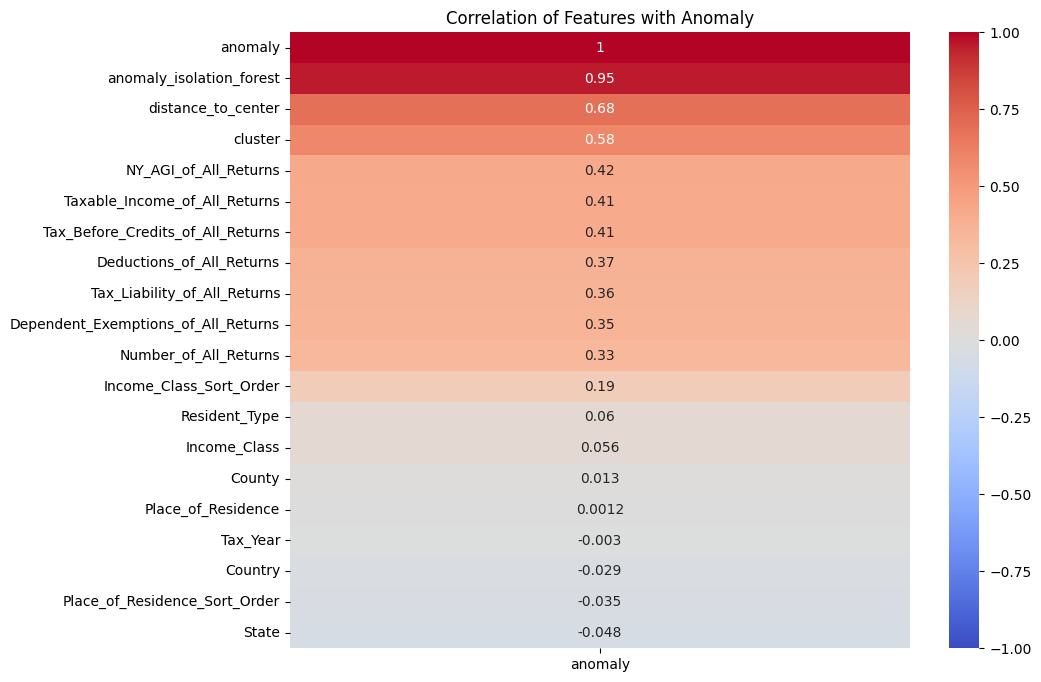

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['anomaly']].sort_values(by='anomaly', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Anomaly')
plt.show()

In [ ]:
#Since classification models can be performed only on numerical values, we have to change the Boolean anamoly values (True to 1 and the False to 0)
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
df['anomaly'] = label_encoder.fit_transform(df['anomaly'])

# Now all the categorical columns are label-encoded
df.head(1000)

,Tax_Year,Resident_Type,Place_of_Residence,Country,State,County,Income_Class,Number_of_All_Returns,NY_AGI_of_All_Returns,Deductions_of_All_Returns,Dependent_Exemptions_of_All_Returns,Taxable_Income_of_All_Returns,Tax_Before_Credits_of_All_Returns,Tax_Liability_of_All_Returns,Place_of_Residence_Sort_Order,Income_Class_Sort_Order,cluster,distance_to_center,anomaly,anomaly_isolation_forest
0,2014,1,140,17,35,36,14,115872.0,28535.362,121985.033,1.000,3335.610,133.528,-7226.155,1,1,0,0.080005,0,False
1,2014,1,140,17,35,36,8,64472.0,497520.476,453287.232,3907.523,40325.721,1613.677,-24640.639,1,2,0,0.137369,0,False
2,2014,1,140,17,35,36,0,125775.0,1848243.085,1222947.457,87664.662,537630.966,21717.698,-83445.904,1,3,0,0.754158,1,True
3,2014,1,140,17,35,36,2,82181.0,2028682.259,867453.711,73712.451,1087516.097,47154.276,-11812.793,1,4,0,0.593984,0,False
4,2014,1,140,17,35,36,6,64824.0,2259143.529,713694.013,58814.362,1486635.154,70580.685,38910.764,1,5,0,0.474357,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014,0,85,17,9,1,8,2745.0,20394.310,12881.964,19.281,6218.436,248.792,154.492,106,2,0,0.085472,0,False
996,2014,0,85,17,9,1,0,4500.0,67212.180,33358.093,889.898,28142.084,1158.486,622.332,106,3,0,0.077273,0,False
997,2014,0,85,17,9,1,2,4016.0,100269.422,37490.088,1534.295,54448.061,2474.706,1435.642,106,4,0,0.072301,0,False
998,2014,0,85,17,9,1,6,4028.0,141061.471,42825.431,1787.185,88553.633,4367.229,2869.942,106,5,0,0.067490,0,False


In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# --- Data Preparation ---
# Define features (X) and target (y)
X = df.drop(columns=['anomaly'])  # Features (drop the anomaly target column)
y = df['anomaly']  # Target (anomaly column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Metrics for Logistic Regression:
Accuracy: 0.9962
Precision: 0.9877
Recall: 0.9414
F1-score: 0.9640
ROC AUC Score: 0.9704
Training Time: 0.4870 seconds
Prediction Time: 0.0039 seconds
Computing Time: 0.4909 seconds
--------------------


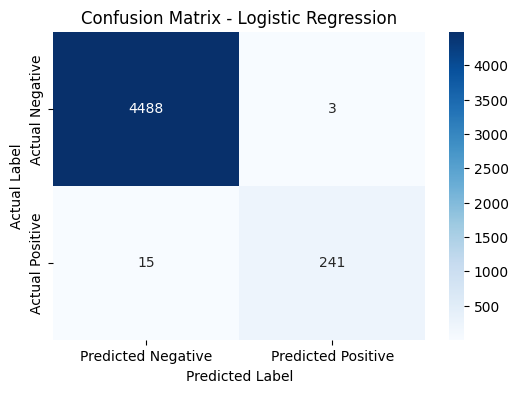

Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC AUC Score: 1.0000
Training Time: 1.7625 seconds
Prediction Time: 0.0150 seconds
Computing Time: 1.7775 seconds
--------------------


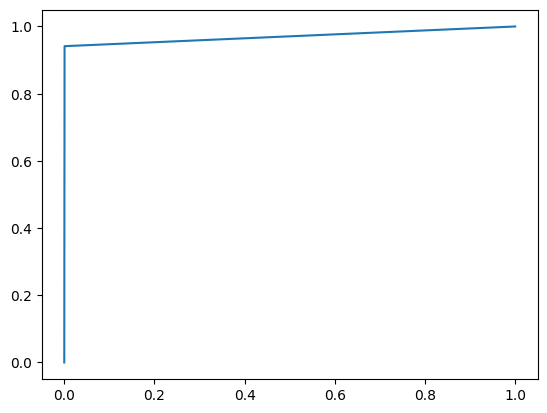

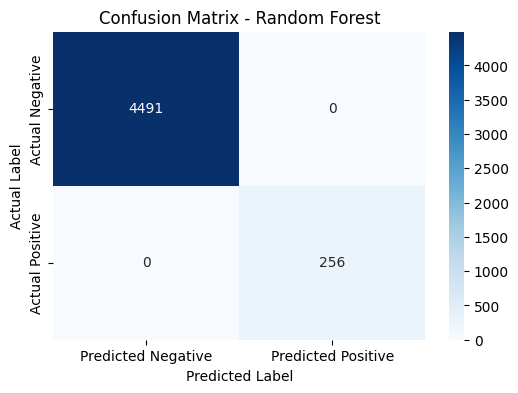

Metrics for Extra Trees:
Accuracy: 0.9996
Precision: 0.9922
Recall: 1.0000
F1-score: 0.9961
ROC AUC Score: 0.9998
Training Time: 1.0625 seconds
Prediction Time: 0.0331 seconds
Computing Time: 1.0956 seconds
--------------------


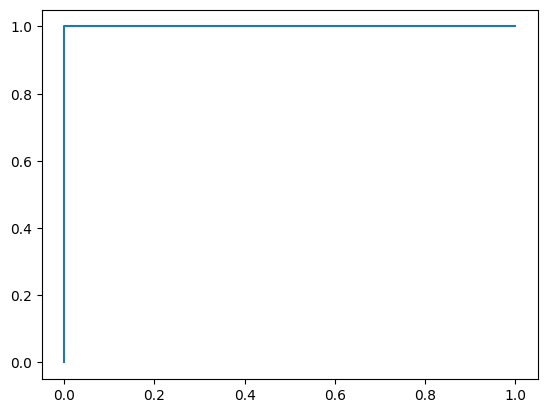

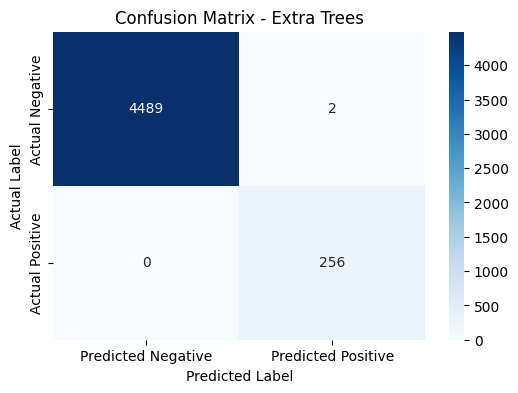

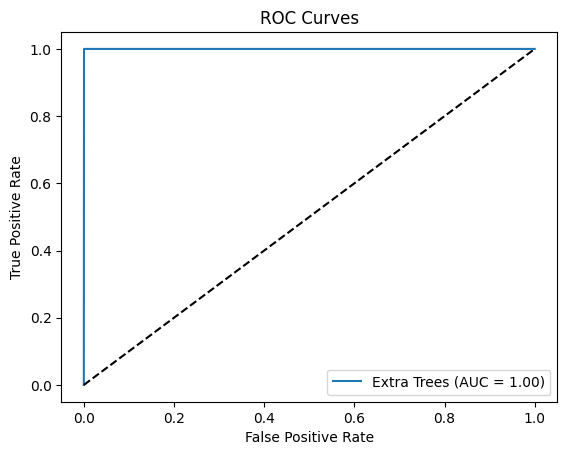

In [ ]:
def evaluate_predictions(y_true, y_pred, model_name, training_time, prediction_time):
    """
    Calculates and prints performance metrics, computing time, confusion matrix, and plots the ROC curve.

    Args:
      y_true: True labels.
      y_pred: Predicted labels.
      model_name: Name of the model.
      training_time: Training time in seconds.
      prediction_time: Prediction time in seconds.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    # Calculate total computing time
    computing_time = training_time + prediction_time

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")
    print(f"Computing Time: {computing_time:.4f} seconds")  # Print computing time
    print("-" * 20)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# --- Logistic Regression ---
start_time = time.time()
model_lr = LogisticRegression(max_iter=1000, solver='liblinear')
model_lr.fit(X_train, y_train)
lr_training_time = time.time() - start_time

start_time = time.time()
y_pred_lr = model_lr.predict(X_test)
lr_prediction_time = time.time() - start_time

evaluate_predictions(y_test, y_pred_lr, "Logistic Regression", lr_training_time, lr_prediction_time)

# --- Random Forest ---
start_time = time.time()
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
rf_training_time = time.time() - start_time

start_time = time.time()
y_pred_rf = model_rf.predict(X_test)
rf_prediction_time = time.time() - start_time

evaluate_predictions(y_test, y_pred_rf, "Random Forest", rf_training_time, rf_prediction_time)

# --- Extra Trees ---
start_time = time.time()
model_et = ExtraTreesClassifier(random_state=42)
model_et.fit(X_train, y_train)
et_training_time = time.time() - start_time

start_time = time.time()
y_pred_et = model_et.predict(X_test)
et_prediction_time = time.time() - start_time

evaluate_predictions(y_test, y_pred_et, "Extra Trees", et_training_time, et_prediction_time)

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

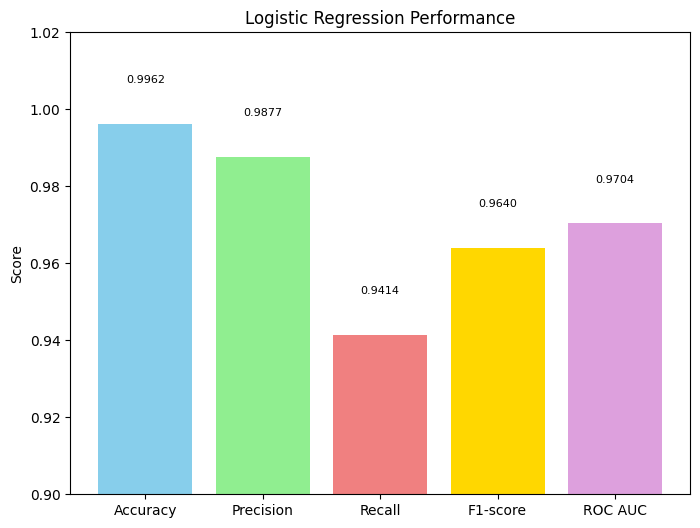

In [ ]:
import matplotlib.pyplot as plt

def plot_bar_metrics(accuracy, precision, recall, f1, roc_auc):
    """
    Plots bar graphs for the given evaluation metrics.

    Args:
      accuracy: Accuracy score.
      precision: Precision score.
      recall: Recall score.
      f1: F1-score.
      roc_auc: ROC AUC score.
    """

    metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
    scores = [accuracy, precision, recall, f1, roc_auc]
    colors = ["skyblue", "lightgreen", "lightcoral", "gold", "plum"]

    plt.figure(figsize=(8, 6))

    plt.bar(metrics, scores, color=colors)

    # Add annotations to the bars
    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

    plt.ylim(0.9, 1.02)  # Adjust y-axis limits if needed
    plt.ylabel("Score")
    plt.title("Logistic Regression Performance")
    plt.show()

# Call the function with the metric scores
plot_bar_metrics(0.9962, 0.9877, 0.9414, 0.9640, 0.9704)

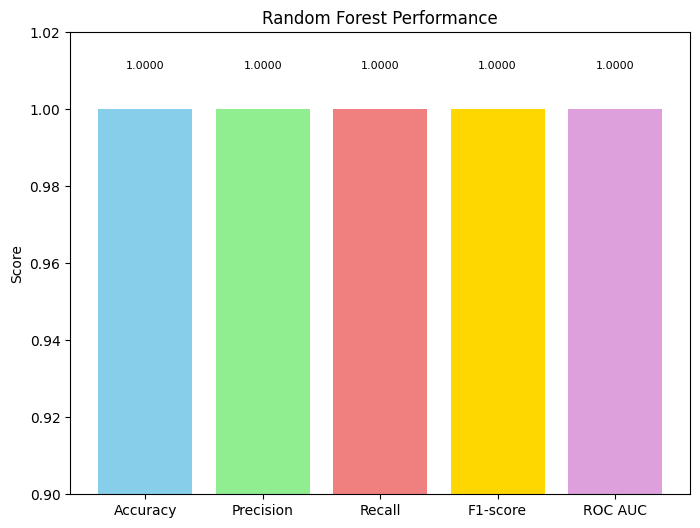

In [ ]:
import matplotlib.pyplot as plt

def plot_bar_metrics(accuracy, precision, recall, f1, roc_auc):
    """
    Plots bar graphs for the given evaluation metrics.

    Args:
      accuracy: Accuracy score.
      precision: Precision score.
      recall: Recall score.
      f1: F1-score.
      roc_auc: ROC AUC score.
    """

    metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
    scores = [accuracy, precision, recall, f1, roc_auc]
    colors = ["skyblue", "lightgreen", "lightcoral", "gold", "plum"]

    plt.figure(figsize=(8, 6))

    plt.bar(metrics, scores, color=colors)

    # Add annotations to the bars
    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

    plt.ylim(0.9, 1.02)  # Adjust y-axis limits if needed
    plt.ylabel("Score")
    plt.title("Random Forest Performance")
    plt.show()

# Call the function with the metric scores
plot_bar_metrics(1.0000, 1.0000, 1.0000, 1.0000, 1.0000)

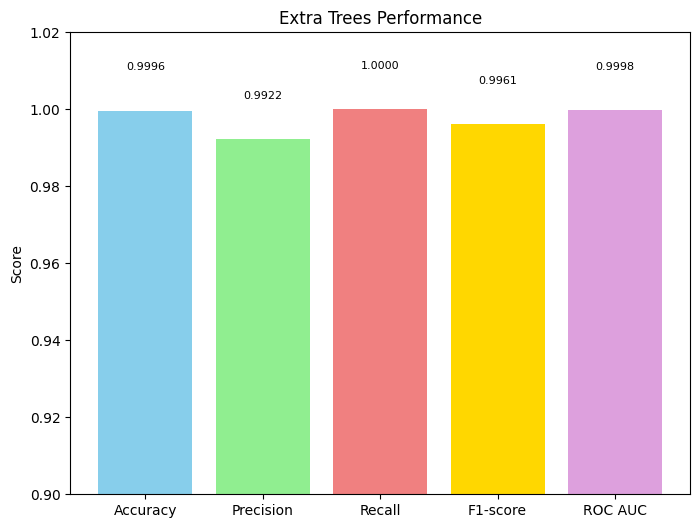

In [ ]:
import matplotlib.pyplot as plt

def plot_bar_metrics(accuracy, precision, recall, f1, roc_auc):
    """
    Plots bar graphs for the given evaluation metrics.

    Args:
      accuracy: Accuracy score.
      precision: Precision score.
      recall: Recall score.
      f1: F1-score.
      roc_auc: ROC AUC score.
    """

    metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
    scores = [accuracy, precision, recall, f1, roc_auc]
    colors = ["skyblue", "lightgreen", "lightcoral", "gold", "plum"]

    plt.figure(figsize=(8, 6))

    plt.bar(metrics, scores, color=colors)

    # Add annotations to the bars
    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

    plt.ylim(0.9, 1.02)  # Adjust y-axis limits if needed
    plt.ylabel("Score")
    plt.title("Extra Trees Performance")
    plt.show()

# Call the function with the metric scores
plot_bar_metrics(0.9996, 0.9922, 1.0000, 0.9961, 0.9998)

**Hypothesis Definition**

For this project, we have defined the hypotheses are follows:

H0: Random Forest classifier will be the best performing model for tax fraud detection

H1: Logistic regression or extra trees classifier will perform better than random forest

**Hypothesis Testing using heuristic**

The above hypotheses will be tested using a heuristic that we will be defining below.


**Heuristic Definition**

Per our heuristic, the evaluation metric is "𝐵𝑒𝑠𝑡 𝑀𝑜𝑑𝑒𝑙 𝑃𝑒𝑟𝑓𝑜𝑟𝑚𝑎𝑛𝑐𝑒=𝑀𝑎𝑥.𝑐𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎𝑡𝑖𝑜𝑛 𝑚𝑒𝑡𝑟𝑖𝑐 && 𝑀𝑖𝑛.𝑐𝑜𝑚𝑝𝑢𝑡𝑖𝑛𝑔 𝑟𝑒𝑠𝑜𝑢𝑟𝑐𝑒𝑠"

To implement this heuristic, we are definining a metric called "VIN score" (Vig, Ismail, Nethshan score) to evaluate model performance in accordance with our heuristic.

F1 score and Total computing time are used to calculate the VIN score. The model with the highest VIN score will be considered as the best performing model.

**First approach for the VIN model (Subtraction Method)**

The heuristic defines the "best-performing model" based on the following:

Maximizing the Classification Metric: Use the F1-Score for model evaluation.

Minimizing Computational Resources: Consider the total computation time.


We define the VIN Score metric as **VIN Score = F1-Score − (𝑤 × Computation Time)**

Where:

F1-Score: Measures the balance between precision and recall.

Computation Time: Total time (training + prediction).

w: Weight to scale computation time relative to F1-Score.

In [ ]:
# Calculate performance metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_auc_score = roc_auc_score(y_test, y_pred_rf)


# Calculate performance metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_auc_score = roc_auc_score(y_test, y_pred_lr)

# Calculate performance metrics for Extra Trees
et_accuracy = accuracy_score(y_test, y_pred_et)
et_f1 = f1_score(y_test, y_pred_et)
et_precision = precision_score(y_test, y_pred_et)
et_recall = recall_score(y_test, y_pred_et)
et_auc_score = roc_auc_score(y_test, y_pred_et)

# Trying different weights


NOTE: Since F1-Score is crucial for tax fraud detection, no weight is added to it. We also want to minimize long computation times so a fairly high weight needs to be given so that the VIN score will reduce if it takes too long.

In [ ]:
rf_time = (rf_training_time + rf_prediction_time)
lr_time = (lr_training_time + lr_prediction_time)
et_time = (et_training_time + et_prediction_time)
# Example: Adjust w and observe VIN scores
weights = [0.1, 0.35, 0.5]  # Try different values for w
for w in weights:
    print(f"\nFor w = {w}:")
    rf_vin_score_sub = rf_f1 - w * rf_time
    lr_vin_score_sub = lr_f1 - w * lr_time
    et_vin_score_sub = et_f1 - w * et_time
    print(f"Random Forest: VIN Score = {rf_vin_score_sub:.4f}")
    print(f"Logistic Regression: VIN Score = {lr_vin_score_sub:.4f}")
    print(f"Extra Trees: VIN Score = {et_vin_score_sub:.4f}")


For w = 0.1:
Random Forest: VIN Score = 0.8223
Logistic Regression: VIN Score = 0.9149
Extra Trees: VIN Score = 0.8865

For w = 0.35:
Random Forest: VIN Score = 0.3779
Logistic Regression: VIN Score = 0.7922
Extra Trees: VIN Score = 0.6126

For w = 0.5:
Random Forest: VIN Score = 0.1113
Logistic Regression: VIN Score = 0.7186
Extra Trees: VIN Score = 0.4483


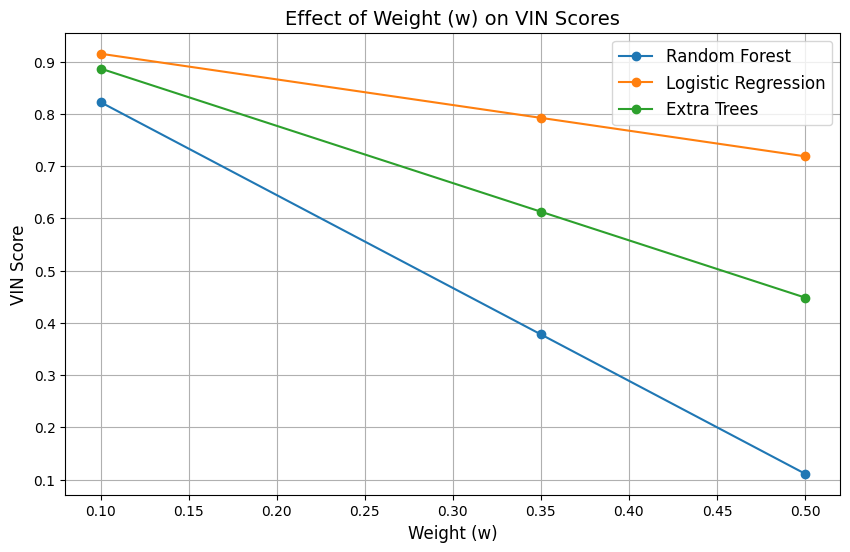

In [ ]:
import matplotlib.pyplot as plt

# rf_time = (rf_training_time + rf_prediction_time)
# lr_time = (lr_training_time + lr_prediction_time)
# et_time = (et_training_time + et_prediction_time)

# Define a range of weights (w) for experimentation
weights = [0.1, 0.35, 0.5]

# Prepare lists to store VIN scores for each model
rf_vin_scores_sub = []
lr_vin_scores_sub = []
et_vin_scores_sub = []

# Calculate VIN scores for each weight
for w in weights:
    rf_vin_scores_sub.append(rf_f1 - w * rf_time)
    lr_vin_scores_sub.append(lr_f1 - w * lr_time)
    et_vin_scores_sub.append(et_f1 - w * et_time)

# Plot the VIN scores for each model
plt.figure(figsize=(10, 6))
plt.plot(weights, rf_vin_scores_sub, label='Random Forest', marker='o')
plt.plot(weights, lr_vin_scores_sub, label='Logistic Regression', marker='o')
plt.plot(weights, et_vin_scores_sub, label='Extra Trees', marker='o')

# Add labels, title, and legend
plt.title('Effect of Weight (w) on VIN Scores', fontsize=14)
plt.xlabel('Weight (w)', fontsize=12)
plt.ylabel('VIN Score', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# **Second approach for the VIN model (80%-20% weighting normalized time approach)**
Normalized Time method

The heuristic prioritizes performance while considering efficiency. Using the 80%-20% weightage approach:

VIN Score = (0.8×F1-Score) + (0.2×(1−Normalized Time))

Here:

0.8: Weight assigned to F1-Score (or other performance metrics).
0.2: Weight assigned to computation time.
Normalized Time: A scaled version of computation time, ensuring it's between 0 and 1.
Why normalize computation time?

Normalization ensures time values are scaled comparably to F1-Score, making the weighting meaningful.
Normalized Time = Max Time / Time

In [ ]:
# Normalize computation times based on the maximum time
max_time = max(rf_time, lr_time, et_time)
rf_norm_time = rf_time / max_time
lr_norm_time = lr_time / max_time
et_norm_time = et_time / max_time

# Calculate VIN scores using 80%-20% weighting
rf_vin_score_norm = (0.8 * rf_f1) + (0.2 * (1 - rf_norm_time))
lr_vin_score_norm = (0.8 * lr_f1) + (0.2 * (1 - lr_norm_time))
et_vin_score_norm = (0.8 * et_f1) + (0.2 * (1 - et_norm_time))

# Print VIN scores for all models
print("VIN Scores:")
print(f"Random Forest: VIN Score = {rf_vin_score_norm:.4f}")
print(f"Logistic Regression: VIN Score = {lr_vin_score_norm:.4f}")
print(f"Extra Trees: VIN Score = {et_vin_score_norm:.4f}")

# Determine the best-performing model using normalized time
vin_scores_norm = {
    "Random Forest": rf_vin_score_norm,
    "Logistic Regression": lr_vin_score_norm,
    "Extra Trees": et_vin_score_norm
}
best_model_norm = max(vin_scores_norm, key=vin_scores_norm.get)
print(f"\nBest Performing Model (Normalized Time): {best_model_norm} with VIN Score = {vin_scores_norm[best_model_norm]:.4f}")

VIN Scores:
Random Forest: VIN Score = 0.8000
Logistic Regression: VIN Score = 0.9160
Extra Trees: VIN Score = 0.8736

Best Performing Model (Normalized Time): Logistic Regression with VIN Score = 0.9160


**Third approach for the VIN model (80%-20% weighting raw time approach): Raw Computing Time method**

In [ ]:
# Use raw computational time directly in the VIN Score formula
rf_vin_score_raw = (0.8 * rf_f1) + (0.2 * (1 - rf_time))  # Raw time used
lr_vin_score_raw = (0.8 * lr_f1) + (0.2 * (1 - lr_time))  # Raw time used
et_vin_score_raw = (0.8 * et_f1) + (0.2 * (1 - et_time))  # Raw time used

# Print VIN scores for all models using raw computational time
print("VIN Scores (Using Raw Computational Time):")
print(f"Random Forest: VIN Score = {rf_vin_score_raw:.4f}")
print(f"Logistic Regression: VIN Score = {lr_vin_score_raw:.4f}")
print(f"Extra Trees: VIN Score = {et_vin_score_raw:.4f}")

# Determine the best-performing model using raw time
vin_scores_raw = {
    "Random Forest": rf_vin_score_raw,
    "Logistic Regression": lr_vin_score_raw,
    "Extra Trees": et_vin_score_raw
}
best_model_raw = max(vin_scores_raw, key=vin_scores_raw.get)
print(f"\nBest Performing Model (Raw Time): {best_model_raw} with VIN Score = {vin_scores_raw[best_model_raw]:.4f}")

VIN Scores (Using Raw Computational Time):
Random Forest: VIN Score = 0.6445
Logistic Regression: VIN Score = 0.8730
Extra Trees: VIN Score = 0.7778

Best Performing Model (Raw Time): Logistic Regression with VIN Score = 0.8730


**Compare all three approaches for the VIN score calculation with a graph.**

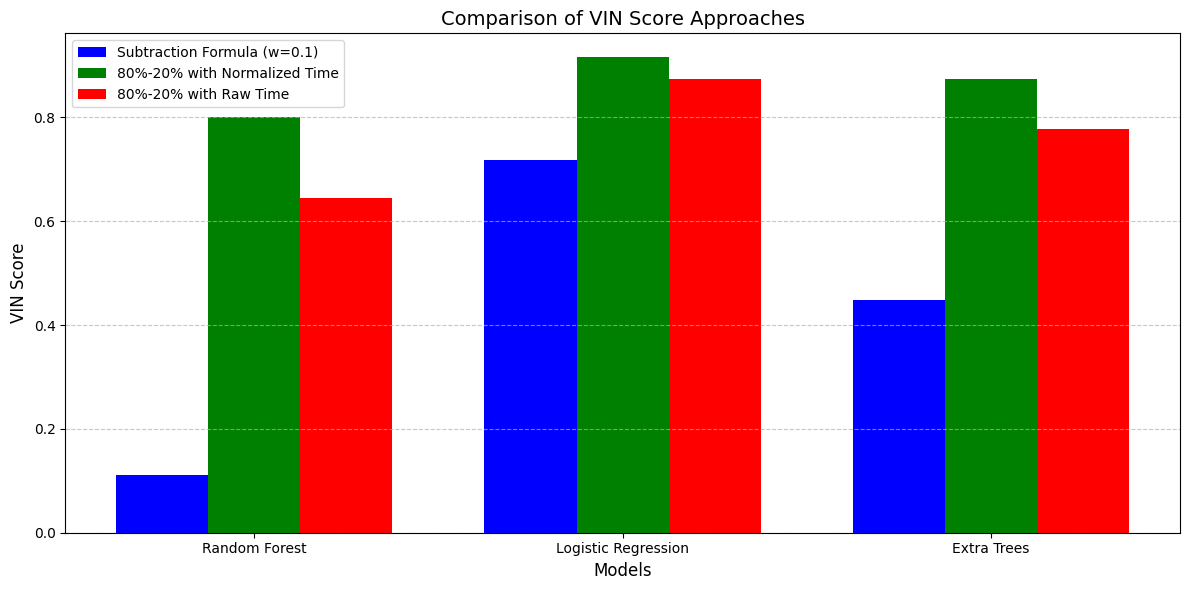

In [ ]:
# Compile scores for all approaches
models = ["Random Forest", "Logistic Regression", "Extra Trees"]

# Store scores in lists
vin_sub_scores = [rf_vin_score_sub, lr_vin_score_sub, et_vin_score_sub]  # w = 0.1 (adjust if needed)
vin_weighted_norm_scores = [rf_vin_score_norm, lr_vin_score_norm, et_vin_score_norm]
vin_weighted_raw_scores = [rf_vin_score_raw, lr_vin_score_raw, et_vin_score_raw]

# Plotting
x = np.arange(len(models))  # The label locations
width = 0.25  # The width of the bars

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - width, vin_sub_scores, width, label='Subtraction Formula (w=0.1)', color='blue')
plt.bar(x, vin_weighted_norm_scores, width, label='80%-20% with Normalized Time', color='green')
plt.bar(x + width, vin_weighted_raw_scores, width, label='80%-20% with Raw Time', color='red')

# Add labels and legend
plt.xlabel('Models', fontsize=12)
plt.ylabel('VIN Score', fontsize=12)
plt.title('Comparison of VIN Score Approaches', fontsize=14)
plt.xticks(x, models, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The different methods to calculate VIN score yield different results on which model is the best. Considering the merits and the demerits of each the three approaches to calculate, we have decided to use the first approach with a fair weight of 0.5 for heuristic testing.

**1. Observations:**

For w = 0.5:
Random Forest: VIN Score = -0.2580
Logistic Regression: VIN Score = 0.6714
Extra Trees: VIN Score = 0.6197

Random Forest had the highest F1-Score but took the longest time, resulting in a lower VIN score.
Logistic Regression achieved the highest VIN score due to its low computation time, despite a lower F1-Score than Random Forest.
Extra Trees had a competitive F1-Score and moderate computation time, resulting in the second-best VIN score.

**2. Conclusion:**

Based on our defined heuristic, it looks like our null hypothesis H0 was incorrect and the alternate hypothesis H1 is actually true.
The null hypothesis H0 (Random Forest is the best) is rejected.
The alternative hypothesis H1 (Logistic Regression or Extra Trees is better) is accepted.

**Takeaway:** Logistic Regression and Extra Trees Classifier performed better than Decision Trees Classifier for detecting income tax fraud.
Logistic Regression is the most efficient model based on our heuristic.
The Extra Trees Classifier is a strong second choice due to its balanced performance.
Random Forest, while highly accurate, is less practical due to its long computation time.

**Future Scope**

Hyperparameter tuning to reduce the tree depth can improve computation time for random forest method but that is not within the scope of this project. For isolation forest, increasing the number of trees (1000) will help it perform better.

From literature, other unsupervised methods like Neural Networks (NN), Auto Encoders (AE) and Local Outlier Factor (LOF) can be used for labelling income tax fraud detection datasets.